## Prediction of Bore Oil Volume

**Life cycle of Machine learning Project**

* Understanding the Problem Statement
* Data Collection
* Exploratory data analysis
* Data Cleaning
* Data Pre-Processing
* Model Training
* Choose best model

## Introduction about the data

The goal is to predict the `oil production` by applying volve oil field production data

* `DATEPRD`: This is likely the date of production or the timestamp associated with the data point.
* `WELL_BORE_CODE`: A unique code or identifier for a specific wellbore or well within an oilfield.

* `NPD_WELL_BORE_CODE`: A code assigned by the Norwegian Petroleum Directorate (NPD) to uniquely identify a wellbore.

* `NPD_WELL_BORE_NAME`: The name or title associated with the wellbore, often provided by the NPD.

* `NPD_FIELD_CODE`: A code assigned by the NPD to uniquely identify an oil or gas field.

* `NPD_FIELD_NAME`: The name of the oil or gas field where the wellbore is located.

* `NPD_FACILITY_CODE`: A code assigned by the NPD to uniquely identify a production facility or installation.

* `NPD_FACILITY_NAME`: The name of the production facility or installation.

* `ON_STREAM_HRS`: The number of hours during which the well or facility was operational or in production.
* `AVG_DOWNHOLE_PRESSURE`: The average downhole pressure measured within the wellbore. It indicates the pressure at the bottom of the well.

* `AVG_DOWNHOLE_TEMPERATURE`: The average downhole temperature measured within the wellbore.

* `AVG_DP_TUBING`: The average differential pressure (DP) in the tubing of the well. This measures the pressure difference between the inside of the tubing and the outside.

* `AVG_ANNULUS_PRESS`: The average pressure measured in the annulus of the well. The annulus is the space between the tubing and casing in the wellbore.

* `AVG_CHOKE_SIZE_P`: The average size of the choke valve used to control the flow of fluids from the well. It's typically measured in percentage open.

* `AVG_CHOKE_UOM`: The unit of measurement for the choke size, such as inches or millimeters.

* `AVG_WHP_P`: The average wellhead pressure, which is the pressure at the surface of the well.

* `AVG_WHT_P`: The average wellhead temperature, which is the temperature at the surface of the well.

* `DP_CHOKE_SIZE`: The size of the choke valve, which is used to control the flow of fluids in the well, typically measured in inches or millimeters.

* `BORE_GAS_VOL`: The volume of gas produced from the wellbore during the specified time period.

* `BORE_WAT_VOL`: The volume of water (produced water) produced from the wellbore during the specified time period.

* `BORE_WI_VOL`: The volume of injected water (water injection) into the wellbore during the specified time period.

* `FLOW_KIND`: The type or mode of flow in the well, which could be categorized based on production, injection, testing, etc.

* `WELL_TYPE`: The classification or type of the well, such as production well, injection well, observation well, etc.

The independent variable

* `BORE_OIL_VOL`: The volume of oil produced from the wellbore during the specified time period.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
df=pd.read_excel("Volve production data.xlsx")
df.head()

,DATEPRD,WELL_BORE_CODE,NPD_WELL_BORE_CODE,NPD_WELL_BORE_NAME,NPD_FIELD_CODE,NPD_FIELD_NAME,NPD_FACILITY_CODE,NPD_FACILITY_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,...,AVG_CHOKE_UOM,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL,FLOW_KIND,WELL_TYPE
0,2014-04-07,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,0.00000,...,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,WI
1,2014-04-08,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,...,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,OP
2,2014-04-09,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,...,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,OP
3,2014-04-10,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,...,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,OP
4,2014-04-11,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,310.37614,...,%,33.09788,10.47992,33.07195,0.0,0.0,0.0,NaN,production,OP


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15634 entries, 0 to 15633
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   DATEPRD                   15634 non-null  datetime64[ns]
 1   WELL_BORE_CODE            15634 non-null  object        
 2   NPD_WELL_BORE_CODE        15634 non-null  int64         
 3   NPD_WELL_BORE_NAME        15634 non-null  object        
 4   NPD_FIELD_CODE            15634 non-null  int64         
 5   NPD_FIELD_NAME            15634 non-null  object        
 6   NPD_FACILITY_CODE         15634 non-null  int64         
 7   NPD_FACILITY_NAME         15634 non-null  object        
 8   ON_STREAM_HRS             15349 non-null  float64       
 9   AVG_DOWNHOLE_PRESSURE     8980 non-null   float64       
 10  AVG_DOWNHOLE_TEMPERATURE  8980 non-null   float64       
 11  AVG_DP_TUBING             8980 non-null   float64       
 12  AVG_ANNULUS_PRESS 

In [4]:
df.describe()

,DATEPRD,NPD_WELL_BORE_CODE,NPD_FIELD_CODE,NPD_FACILITY_CODE,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL
count,15634,15634.000000,15634.0,15634.0,15349.000000,8980.000000,8980.000000,8980.000000,7890.000000,8919.000000,9155.000000,9146.000000,15340.000000,9161.000000,9161.000000,9161.000000,5706.000000
mean,2012-11-07 17:39:58.004349440,5908.581745,3420717.0,369304.0,19.994093,181.803869,77.162969,154.028787,14.856100,55.168533,45.377811,67.728440,11.441060,1095.631548,161049.059703,1672.151332,5315.480815
min,2007-09-01 00:00:00,5351.000000,3420717.0,369304.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-457.840000,0.000000
25%,2010-07-30 00:00:00,5599.000000,3420717.0,369304.0,24.000000,0.000000,0.000000,83.665361,10.841437,18.952989,31.148062,56.577834,0.000000,190.690000,29430.590000,19.870000,4338.204674
50%,2013-05-08 00:00:00,5693.000000,3420717.0,369304.0,24.000000,232.896939,103.186689,175.588861,16.308598,52.096877,37.933620,80.071250,2.384969,557.550000,87749.660000,1097.790000,5504.739769
75%,2015-02-19 00:00:00,5769.000000,3420717.0,369304.0,24.000000,255.401455,106.276591,204.319964,21.306125,99.924288,57.101268,88.062202,13.765020,1345.200000,202482.300000,3260.950000,6781.058040
max,2016-12-01 00:00:00,7405.000000,3420717.0,369304.0,25.000000,397.588550,108.502178,345.906770,30.019828,100.000000,137.311030,93.509584,125.718570,5901.840000,851131.520000,8019.740000,10013.600000
std,NaN,649.231622,0.0,0.0,8.369978,109.712363,45.657948,76.752373,8.406822,36.692924,24.752631,27.719028,19.816928,1323.538151,188136.410434,1706.982853,2181.486695


In [5]:
df.isna().sum()

DATEPRD                        0
WELL_BORE_CODE                 0
NPD_WELL_BORE_CODE             0
NPD_WELL_BORE_NAME             0
NPD_FIELD_CODE                 0
NPD_FIELD_NAME                 0
NPD_FACILITY_CODE              0
NPD_FACILITY_NAME              0
ON_STREAM_HRS                285
AVG_DOWNHOLE_PRESSURE       6654
AVG_DOWNHOLE_TEMPERATURE    6654
AVG_DP_TUBING               6654
AVG_ANNULUS_PRESS           7744
AVG_CHOKE_SIZE_P            6715
AVG_CHOKE_UOM               6473
AVG_WHP_P                   6479
AVG_WHT_P                   6488
DP_CHOKE_SIZE                294
BORE_OIL_VOL                6473
BORE_GAS_VOL                6473
BORE_WAT_VOL                6473
BORE_WI_VOL                 9928
FLOW_KIND                      0
WELL_TYPE                      0
dtype: int64

columns well type, floW_kind and etc has no missing values, Bore water injection volume has significant missing values

## Exploratory Data Analysis 

In [6]:
numerical_feature = [features for features in df.columns if df[features].dtype !='O']
categorical_features=[features for features in df.columns if df[features].dtype == 'O']

print(f"Number of numerical_features {len(numerical_feature)}   :  {numerical_feature}")
print(f"number of categorical features {len(categorical_features)} : {categorical_features}")

Number of numerical_features 17   :  ['DATEPRD', 'NPD_WELL_BORE_CODE', 'NPD_FIELD_CODE', 'NPD_FACILITY_CODE', 'ON_STREAM_HRS', 'AVG_DOWNHOLE_PRESSURE', 'AVG_DOWNHOLE_TEMPERATURE', 'AVG_DP_TUBING', 'AVG_ANNULUS_PRESS', 'AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DP_CHOKE_SIZE', 'BORE_OIL_VOL', 'BORE_GAS_VOL', 'BORE_WAT_VOL', 'BORE_WI_VOL']
number of categorical features 7 : ['WELL_BORE_CODE', 'NPD_WELL_BORE_NAME', 'NPD_FIELD_NAME', 'NPD_FACILITY_NAME', 'AVG_CHOKE_UOM', 'FLOW_KIND', 'WELL_TYPE']


In [7]:
## Portion of counts in categorical columns
for columns in categorical_features:
    print(df[columns].value_counts(normalize=100)*100)

WELL_BORE_CODE
NO 15/9-F-4 AH    21.280542
NO 15/9-F-5 AH    21.146220
NO 15/9-F-12 H    19.547141
NO 15/9-F-14 H    19.547141
NO 15/9-F-11 H     7.451708
NO 15/9-F-15 D     6.255597
NO 15/9-F-1 C      4.771652
Name: proportion, dtype: float64
NPD_WELL_BORE_NAME
15/9-F-4       21.280542
15/9-F-5       21.146220
15/9-F-12      19.547141
15/9-F-14      19.547141
15/9-F-11       7.451708
15/9-F-15 D     6.255597
15/9-F-1 C      4.771652
Name: proportion, dtype: float64
NPD_FIELD_NAME
VOLVE    100.0
Name: proportion, dtype: float64
NPD_FACILITY_NAME
MÆRSK INSPIRER    100.0
Name: proportion, dtype: float64
AVG_CHOKE_UOM
%    100.0
Name: proportion, dtype: float64
FLOW_KIND
production    58.596648
injection     41.403352
Name: proportion, dtype: float64
WELL_TYPE
OP    58.481515
WI    41.518485
Name: proportion, dtype: float64


**Insights**
* `NPD_FIELD_NAME`,`NPD_FACILITY_NAME`: This features only contain one category, it means it has no variablity and add no meaning to the model prediction
* `NPD_WELL_BORE_NAME`: It has got 7 category, which means 7 wellls

In [8]:
df.shape

(15634, 24)

**Deleting columns which have unique values more than 15000 as it wont help in data modeling**

In [9]:
numerical_features_deleted=[features for features in numerical_feature if len(df[features].unique())>1500]
numerical_features_deleted

['DATEPRD',
 'AVG_DOWNHOLE_PRESSURE',
 'AVG_DOWNHOLE_TEMPERATURE',
 'AVG_DP_TUBING',
 'AVG_ANNULUS_PRESS',
 'AVG_CHOKE_SIZE_P',
 'AVG_WHP_P',
 'AVG_WHT_P',
 'DP_CHOKE_SIZE',
 'BORE_OIL_VOL',
 'BORE_GAS_VOL',
 'BORE_WAT_VOL',
 'BORE_WI_VOL']

## Univariate Analysis
The term univariate analysis refers to the analysis of one variable prefix “uni” means “one.” The purpose of univariate analysis is to understand the distribution of values for a single variable.
Other Type of Analysis are

## Bivariate Analysis: The analysis of two variables.
## Multivariate Analysis: The analysis of two or more variables.
Numerical Features

In [10]:
numerical_heatmap=df[numerical_feature].drop(columns='DATEPRD')

In [11]:
for col in df.columns:
    try:
        if df[col].dtype == 'int64':  # Check for integer columns
            print(f"Column '{col}' is int64 and may need a condition fix")
    except Exception as e:
        print(f"Error in column '{col}': {e}")

Column 'NPD_WELL_BORE_CODE' is int64 and may need a condition fix
Column 'NPD_FIELD_CODE' is int64 and may need a condition fix
Column 'NPD_FACILITY_CODE' is int64 and may need a condition fix


<Axes: >

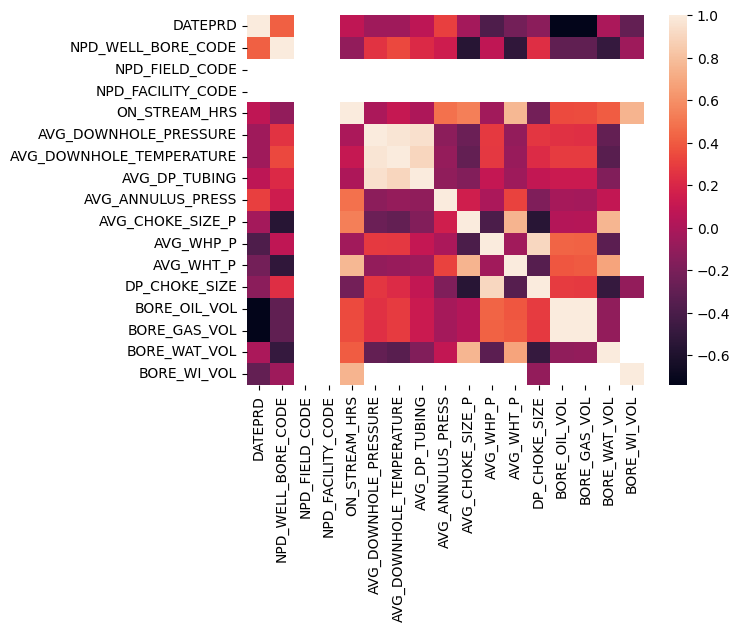

In [12]:
sns.heatmap(df[numerical_feature].corr())

In [13]:
df[numerical_feature].corr()

,DATEPRD,NPD_WELL_BORE_CODE,NPD_FIELD_CODE,NPD_FACILITY_CODE,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL
DATEPRD,1.000000,0.419029,NaN,NaN,0.081380,-0.047654,-0.051228,0.070228,0.306117,-0.026258,-0.379515,-0.222923,-0.133391,-0.737084,-0.738990,-0.004339,-0.294773
NPD_WELL_BORE_CODE,0.419029,1.000000,NaN,NaN,-0.102270,0.257481,0.339509,0.218243,0.141756,-0.558461,0.077946,-0.519515,0.237647,-0.307645,-0.310793,-0.493591,-0.055894
NPD_FIELD_CODE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NPD_FACILITY_CODE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ON_STREAM_HRS,0.081380,-0.102270,NaN,NaN,1.000000,-0.003092,0.105931,0.002824,0.482779,0.531331,-0.044900,0.763229,-0.229295,0.342031,0.353713,0.405123,0.749544
AVG_DOWNHOLE_PRESSURE,-0.047654,0.257481,NaN,NaN,-0.003092,1.000000,0.967826,0.949734,-0.124023,-0.262804,0.283359,-0.095114,0.267649,0.248571,0.245981,-0.296765,NaN
AVG_DOWNHOLE_TEMPERATURE,-0.051228,0.339509,NaN,NaN,0.105931,0.967826,1.000000,0.898954,-0.087189,-0.295764,0.274247,-0.076801,0.221986,0.289819,0.287328,-0.343581,NaN
AVG_DP_TUBING,0.070228,0.218243,NaN,NaN,0.002824,0.949734,0.898954,1.000000,-0.110382,-0.162100,0.102476,-0.054496,0.093282,0.126964,0.125475,-0.171882,NaN
AVG_ANNULUS_PRESS,0.306117,0.141756,NaN,NaN,0.482779,-0.124023,-0.087189,-0.110382,1.000000,0.155142,-0.003255,0.316138,-0.178271,-0.025095,-0.028252,0.094019,NaN
AVG_CHOKE_SIZE_P,-0.026258,-0.558461,NaN,NaN,0.531331,-0.262804,-0.295764,-0.162100,0.155142,1.000000,-0.398607,0.752825,-0.551193,0.029671,0.039699,0.760294,NaN


In [14]:
num_features = len(categorical_features)
rows = (num_features // 4) + 1  # Number of rows for subplots
cols = 4  # Number of columns for subplots

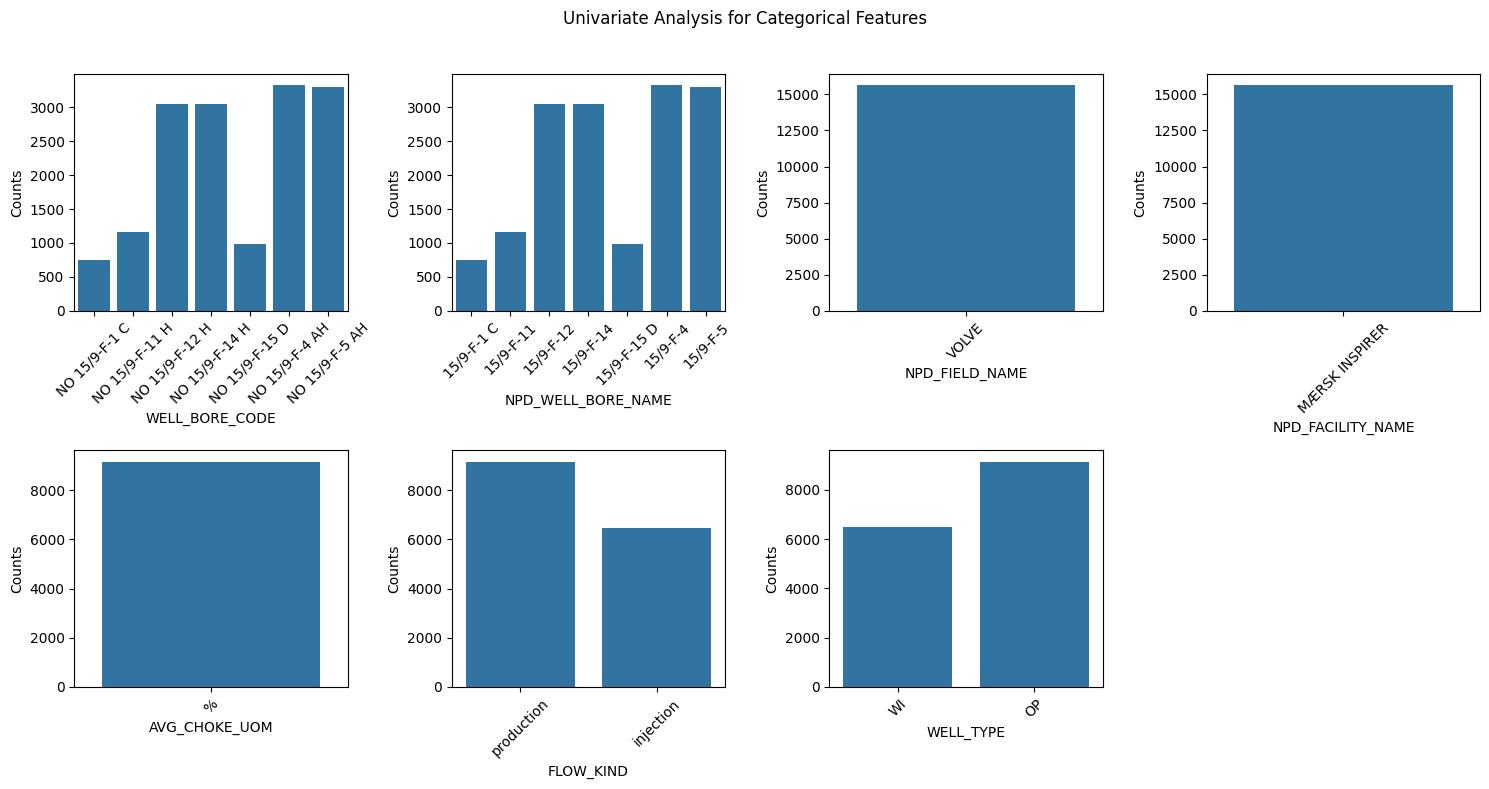

In [15]:
plt.figure(figsize=(15, 8))
plt.suptitle("Univariate Analysis for Categorical Features")

for i in range(num_features):
    plt.subplot(rows, cols, i + 1)
    sns.countplot(x=df[categorical_features[i]])  # Pass the Series correctly
    plt.xlabel(categorical_features[i])
    plt.ylabel("Counts")
    plt.xticks(rotation=45)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


## Check Multicollinearity for Categorical features
* A chi-squared test (also chi-square or χ2 test) is a statistical hypothesis test that is valid to perform when the test statistic is chi-squared distributed under the null hypothesis, specifically Pearson's chi-squared test

* A chi-square statistic is one way to show a relationship between two categorical variables.

* Here we test correlation of Categorical columns with Target column i.e case_status

Null Hypothesis (
): The Feature is independent of target column (No-Correlation)

Alternative Hypothesis (
): The Feature and Target column are not independent (Correalted)

**Checking for null values**

In [16]:
df.isnull().sum()

DATEPRD                        0
WELL_BORE_CODE                 0
NPD_WELL_BORE_CODE             0
NPD_WELL_BORE_NAME             0
NPD_FIELD_CODE                 0
NPD_FIELD_NAME                 0
NPD_FACILITY_CODE              0
NPD_FACILITY_NAME              0
ON_STREAM_HRS                285
AVG_DOWNHOLE_PRESSURE       6654
AVG_DOWNHOLE_TEMPERATURE    6654
AVG_DP_TUBING               6654
AVG_ANNULUS_PRESS           7744
AVG_CHOKE_SIZE_P            6715
AVG_CHOKE_UOM               6473
AVG_WHP_P                   6479
AVG_WHT_P                   6488
DP_CHOKE_SIZE                294
BORE_OIL_VOL                6473
BORE_GAS_VOL                6473
BORE_WAT_VOL                6473
BORE_WI_VOL                 9928
FLOW_KIND                      0
WELL_TYPE                      0
dtype: int64

In [17]:
### I would like to plot Bore of oil produced by a specific well vs time perieod

In [18]:
df.nunique()

DATEPRD                     3327
WELL_BORE_CODE                 7
NPD_WELL_BORE_CODE             7
NPD_WELL_BORE_NAME             7
NPD_FIELD_CODE                 1
NPD_FIELD_NAME                 1
NPD_FACILITY_CODE              1
NPD_FACILITY_NAME              1
ON_STREAM_HRS                925
AVG_DOWNHOLE_PRESSURE       6567
AVG_DOWNHOLE_TEMPERATURE    6461
AVG_DP_TUBING               8684
AVG_ANNULUS_PRESS           6644
AVG_CHOKE_SIZE_P            6419
AVG_CHOKE_UOM                  1
AVG_WHP_P                   8829
AVG_WHT_P                   8793
DP_CHOKE_SIZE               9057
BORE_OIL_VOL                7818
BORE_GAS_VOL                8005
BORE_WAT_VOL                7361
BORE_WI_VOL                 5258
FLOW_KIND                      2
WELL_TYPE                      2
dtype: int64

In [19]:
df['NPD_WELL_BORE_CODE'].unique()

array([7405, 7078, 5599, 5351, 7289, 5693, 5769], dtype=int64)

## Well_1 ==7405

In [20]:
Well_1=df[df['NPD_WELL_BORE_CODE']==7405]
Well_2=df[df['NPD_WELL_BORE_CODE']==7078]
Well_3=df[df['NPD_WELL_BORE_CODE']==5599]
Well_4=df[df['NPD_WELL_BORE_CODE']==5351]
Well_5=df[df['NPD_WELL_BORE_CODE']==7289]
Well_6=df[df['NPD_WELL_BORE_CODE']==5693]
Well_7=df[df['NPD_WELL_BORE_CODE']==5769]



In [21]:
Well_1.isnull().sum()

DATEPRD                       0
WELL_BORE_CODE                0
NPD_WELL_BORE_CODE            0
NPD_WELL_BORE_NAME            0
NPD_FIELD_CODE                0
NPD_FIELD_NAME                0
NPD_FACILITY_CODE             0
NPD_FACILITY_NAME             0
ON_STREAM_HRS                 0
AVG_DOWNHOLE_PRESSURE         3
AVG_DOWNHOLE_TEMPERATURE      3
AVG_DP_TUBING                 3
AVG_ANNULUS_PRESS           729
AVG_CHOKE_SIZE_P              0
AVG_CHOKE_UOM                 0
AVG_WHP_P                     0
AVG_WHT_P                     0
DP_CHOKE_SIZE                 0
BORE_OIL_VOL                  0
BORE_GAS_VOL                  0
BORE_WAT_VOL                  0
BORE_WI_VOL                 746
FLOW_KIND                     0
WELL_TYPE                     0
dtype: int64

In [22]:
Well_1['BORE_OIL_VOL'].describe()

count     746.000000
mean      238.216260
std       275.735496
min         0.000000
25%         0.000000
50%       200.685000
75%       384.605000
max      1549.810000
Name: BORE_OIL_VOL, dtype: float64

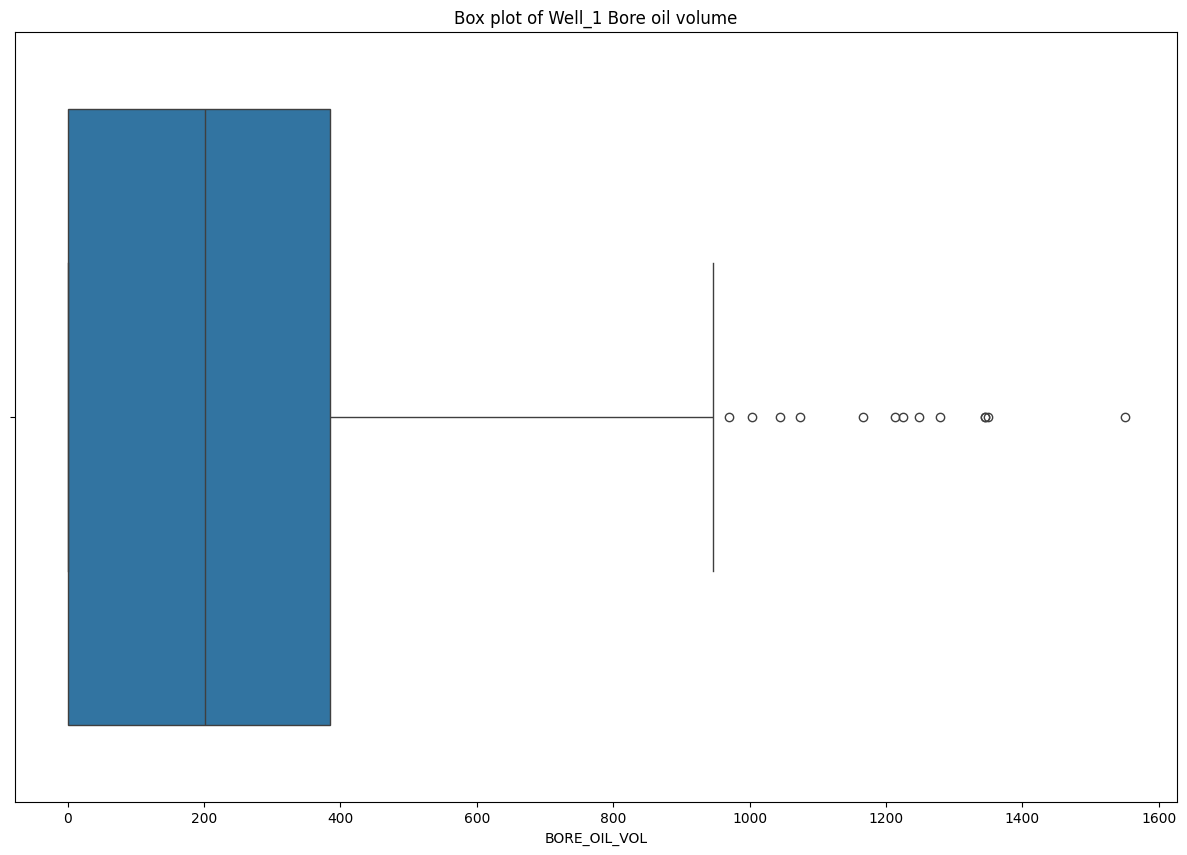

In [23]:
plt.figure(figsize=(15,10))
sns.boxplot(x=Well_1['BORE_OIL_VOL'])
plt.title('Box plot of Well_1 Bore oil volume')
plt.show()



In [24]:
## Calculate Q1 (25%) and Q3 (75%)
Q1= Well_1['BORE_OIL_VOL'].quantile(0.25)
Q3=Well_1['BORE_OIL_VOL'].quantile(0.75)

## Compute IQR
IQR=Q3-Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

Well_1_filtered=Well_1[(Well_1['BORE_OIL_VOL']>=lower_bound) & (Well_1['BORE_OIL_VOL']<=upper_bound)]
print(f"Outliers removed: {len(Well_1) - len(Well_1_filtered)} rows")


Outliers removed: 13 rows


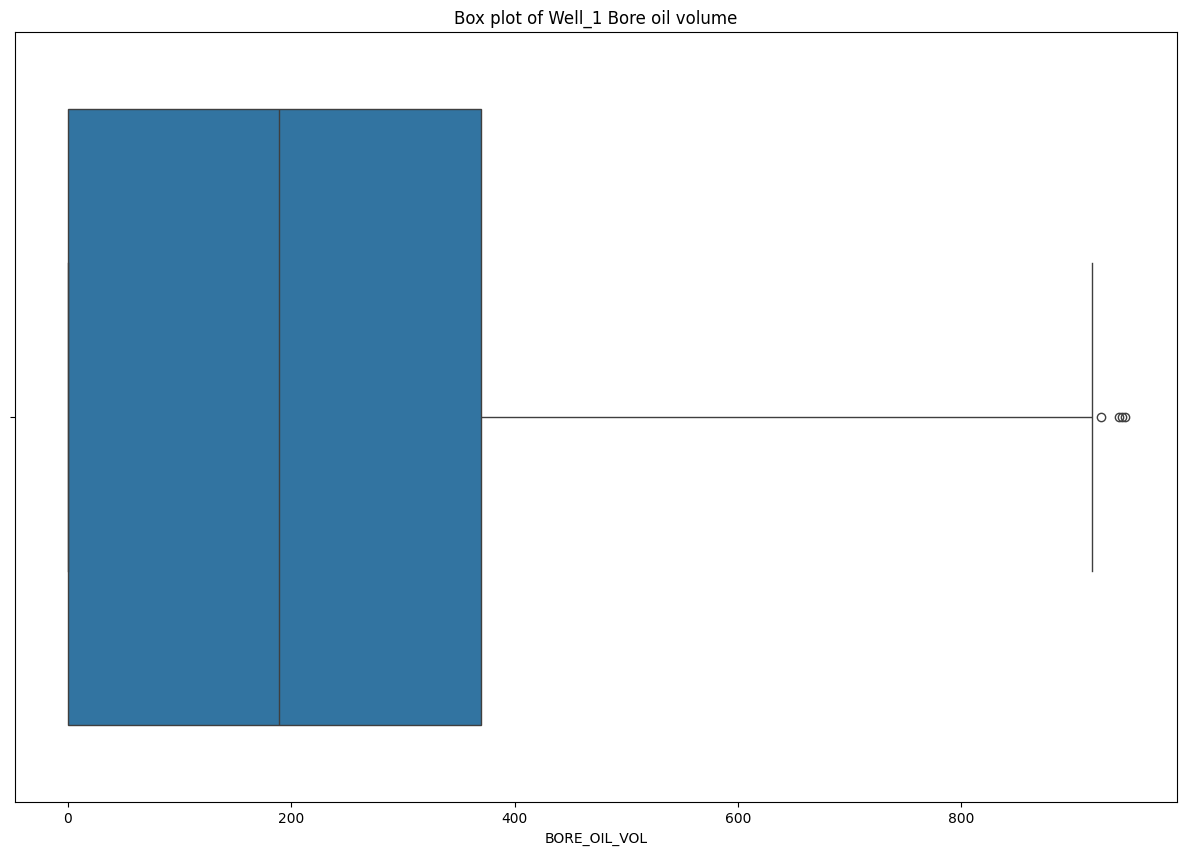

In [25]:
plt.figure(figsize=(15,10))
sns.boxplot(x=Well_1_filtered['BORE_OIL_VOL'])
plt.title('Box plot of Well_1 Bore oil volume')
plt.show()


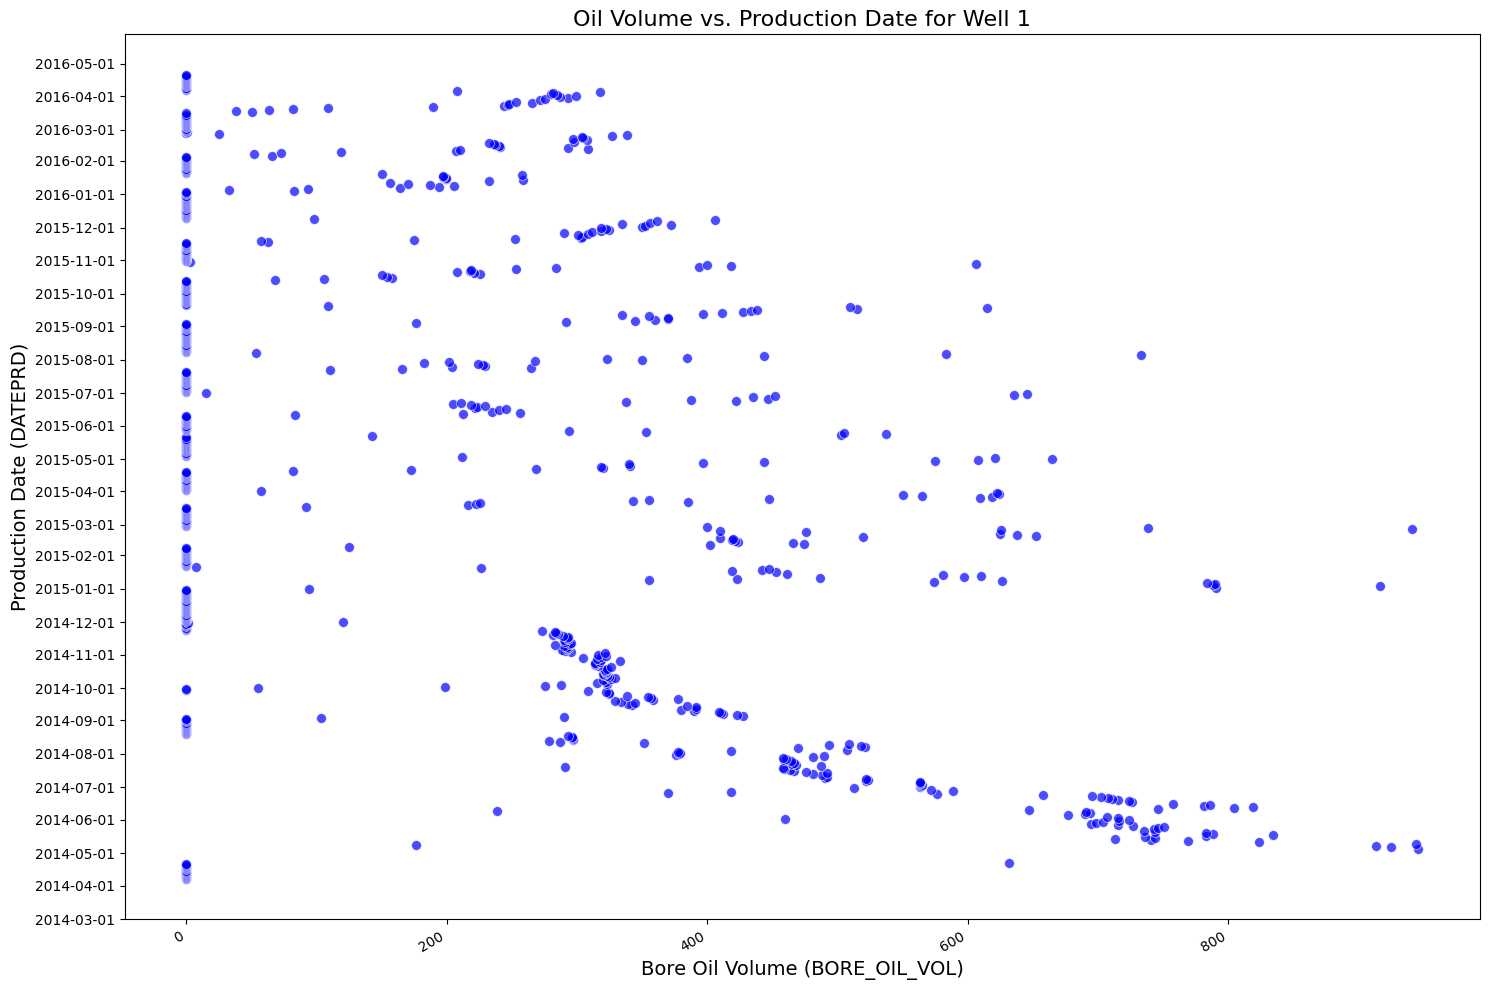

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

# Create the scatterplot with improvements
plt.figure(figsize=(15, 10))

# Customize the scatterplot
sns.scatterplot(x=Well_1_filtered['BORE_OIL_VOL'], 
                y=Well_1_filtered['DATEPRD'], 
                color='blue',          # Set marker color
                s=50,                  # Marker size
                marker='o',            # Marker shape
                alpha=0.7)             # Transparency for better visibility

# Set axis labels and plot title
plt.title("Oil Volume vs. Production Date for Well 1", fontsize=16)
plt.xlabel("Bore Oil Volume (BORE_OIL_VOL)", fontsize=14)
plt.ylabel("Production Date (DATEPRD)", fontsize=14)

# Rotate date labels on y-axis and format
plt.gca().yaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Format y-axis as dates
plt.gca().yaxis.set_major_locator(mdates.MonthLocator())  # Show major ticks for months
plt.gcf().autofmt_xdate()  # Automatically format date labels

# Show the improved plot
plt.tight_layout()
plt.show()


## Well_2 

In [27]:
Well_2.isnull().sum()

DATEPRD                        0
WELL_BORE_CODE                 0
NPD_WELL_BORE_CODE             0
NPD_WELL_BORE_NAME             0
NPD_FIELD_CODE                 0
NPD_FIELD_NAME                 0
NPD_FACILITY_CODE              0
NPD_FACILITY_NAME              0
ON_STREAM_HRS                  0
AVG_DOWNHOLE_PRESSURE          6
AVG_DOWNHOLE_TEMPERATURE       6
AVG_DP_TUBING                  6
AVG_ANNULUS_PRESS              6
AVG_CHOKE_SIZE_P               2
AVG_CHOKE_UOM                  0
AVG_WHP_P                      6
AVG_WHT_P                      6
DP_CHOKE_SIZE                  6
BORE_OIL_VOL                   0
BORE_GAS_VOL                   0
BORE_WAT_VOL                   0
BORE_WI_VOL                 1165
FLOW_KIND                      0
WELL_TYPE                      0
dtype: int64

In [28]:
Well_2['BORE_OIL_VOL'].describe()

count    1165.000000
mean      985.278197
std       437.060790
min         0.000000
25%       648.240000
50%      1077.760000
75%      1229.060000
max      2064.610000
Name: BORE_OIL_VOL, dtype: float64

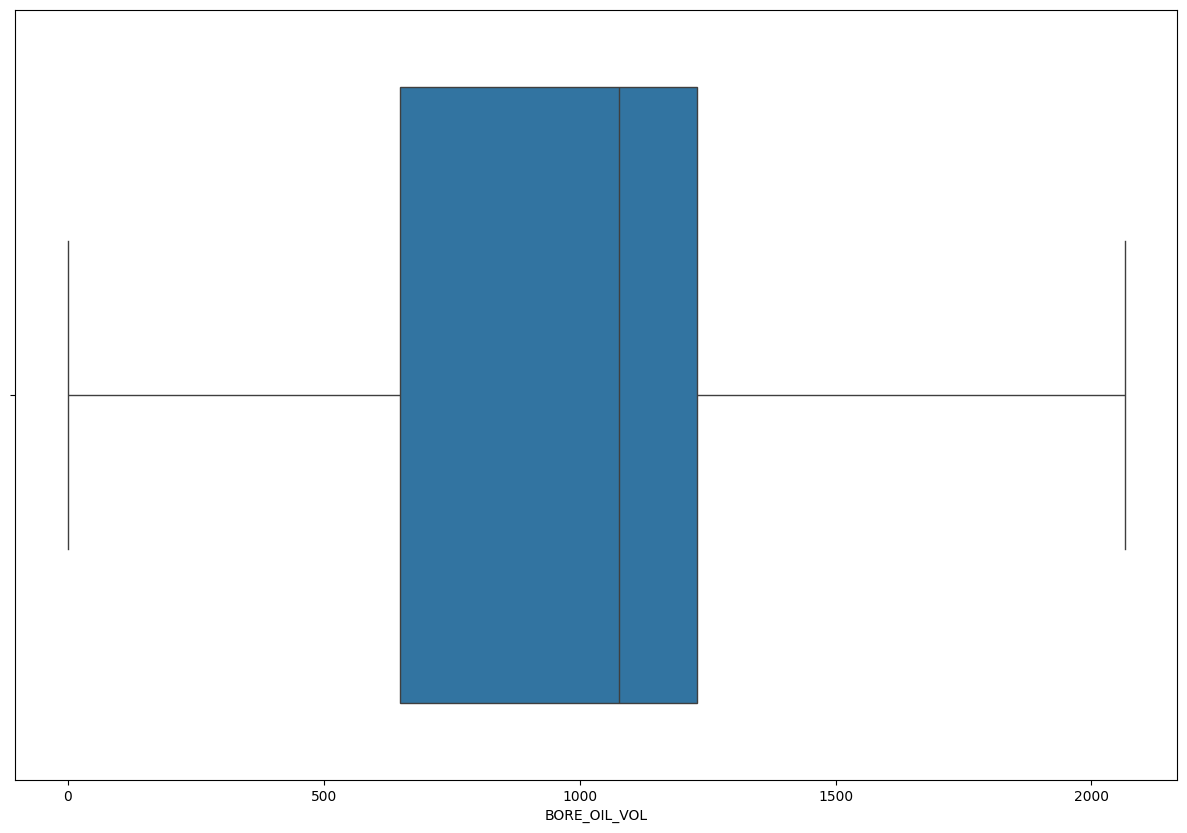

In [29]:
plt.figure(figsize=(15,10))
sns.boxplot(data=Well_2,x=Well_2['BORE_OIL_VOL'])
plt.show()

## No Outliers 

## Scatter ploting Bore oil volume vs Dateprd

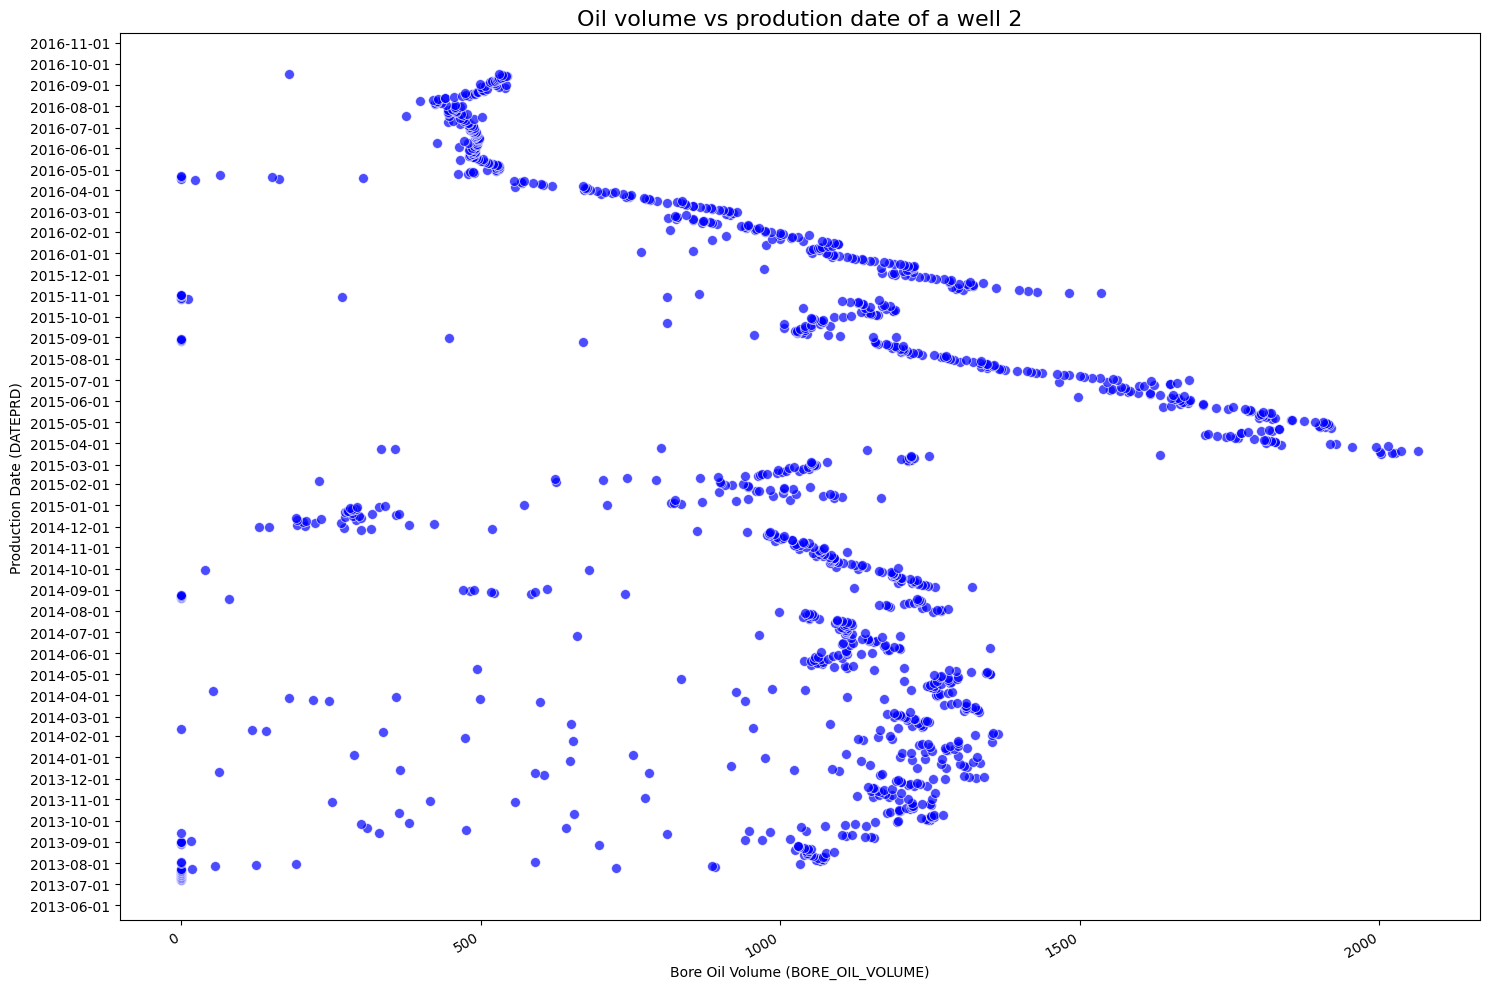

In [30]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=Well_2,x=Well_2['BORE_OIL_VOL'],y=Well_2['DATEPRD'],
                color='blue',
                s=50,
                markers='o',
                alpha=0.7)
## Set axis label and plot title
plt.title('Oil volume vs prodution date of a well 2',fontsize=16)
plt.xlabel('Bore Oil Volume (BORE_OIL_VOLUME)')
plt.ylabel('Production Date (DATEPRD)')

## Rotate date label on y_axis
plt.gca().yaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Format y-axis as dates
plt.gca().yaxis.set_major_locator(mdates.MonthLocator())  # Show major ticks for months
plt.gcf().autofmt_xdate()  # Automatically format date labels

# Show the improved plot
plt.tight_layout()
plt.show()


## Well_3

In [31]:
Well_3.isnull().sum()

DATEPRD                        0
WELL_BORE_CODE                 0
NPD_WELL_BORE_CODE             0
NPD_WELL_BORE_NAME             0
NPD_FIELD_CODE                 0
NPD_FIELD_NAME                 0
NPD_FACILITY_CODE              0
NPD_FACILITY_NAME              0
ON_STREAM_HRS                  0
AVG_DOWNHOLE_PRESSURE          6
AVG_DOWNHOLE_TEMPERATURE       6
AVG_DP_TUBING                  6
AVG_ANNULUS_PRESS             13
AVG_CHOKE_SIZE_P              44
AVG_CHOKE_UOM                  0
AVG_WHP_P                      0
AVG_WHT_P                      0
DP_CHOKE_SIZE                  0
BORE_OIL_VOL                   0
BORE_GAS_VOL                   0
BORE_WAT_VOL                   0
BORE_WI_VOL                 3056
FLOW_KIND                      0
WELL_TYPE                      0
dtype: int64

In [32]:
Well_3['BORE_OIL_VOL'].describe()

count    3056.000000
mean     1498.563334
std      1662.851799
min         0.000000
25%       266.222500
50%       697.655000
75%      2404.467500
max      5901.840000
Name: BORE_OIL_VOL, dtype: float64

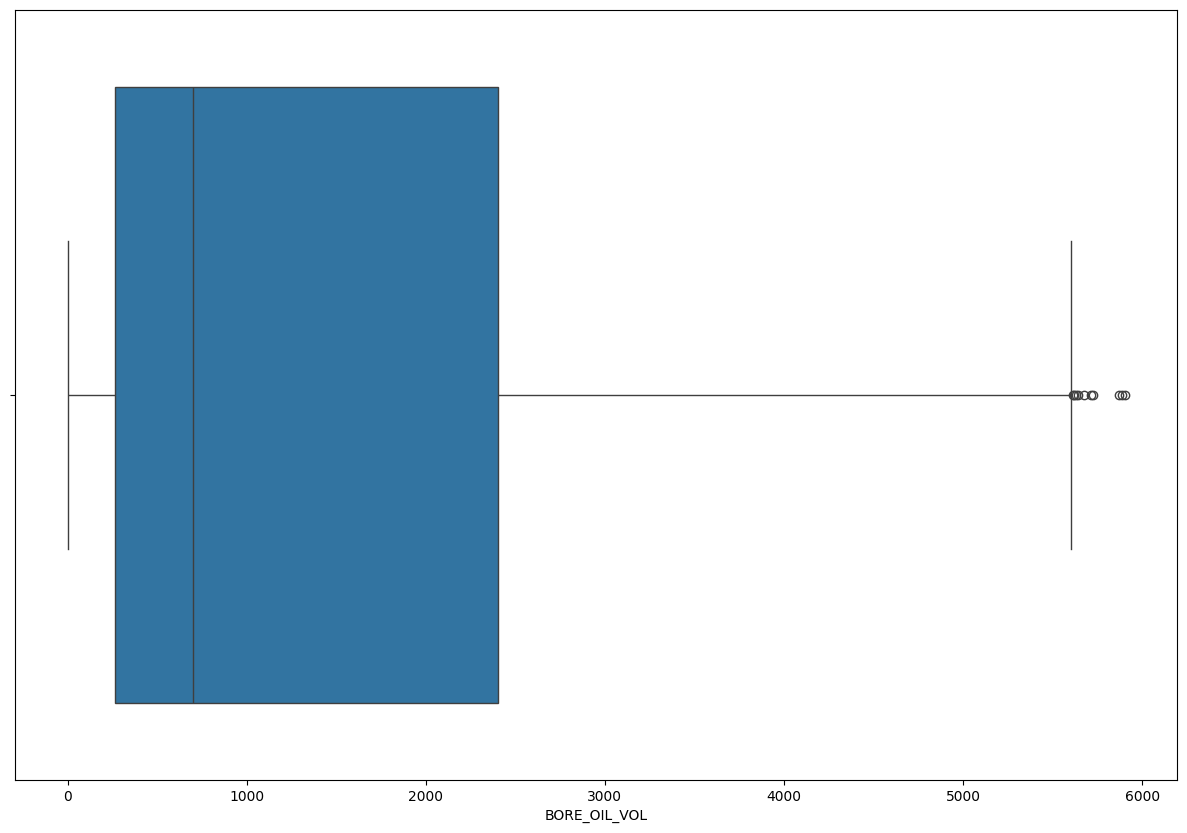

In [33]:
plt.figure(figsize=(15,10))
sns.boxplot(data=Well_3,x=Well_3['BORE_OIL_VOL'])
plt.show()

In [34]:
## Calculate Q1 (25%) and Q3 (75%)
Q1= Well_3['BORE_OIL_VOL'].quantile(0.25)
Q3=Well_3['BORE_OIL_VOL'].quantile(0.75)

## Compute IQR
IQR=Q3-Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

Well_3_filtered=Well_3[(Well_3['BORE_OIL_VOL']>=lower_bound) & (Well_3['BORE_OIL_VOL']<=upper_bound)]
print(f"Outliers removed: {len(Well_3) - len(Well_3_filtered)} rows")


Outliers removed: 10 rows


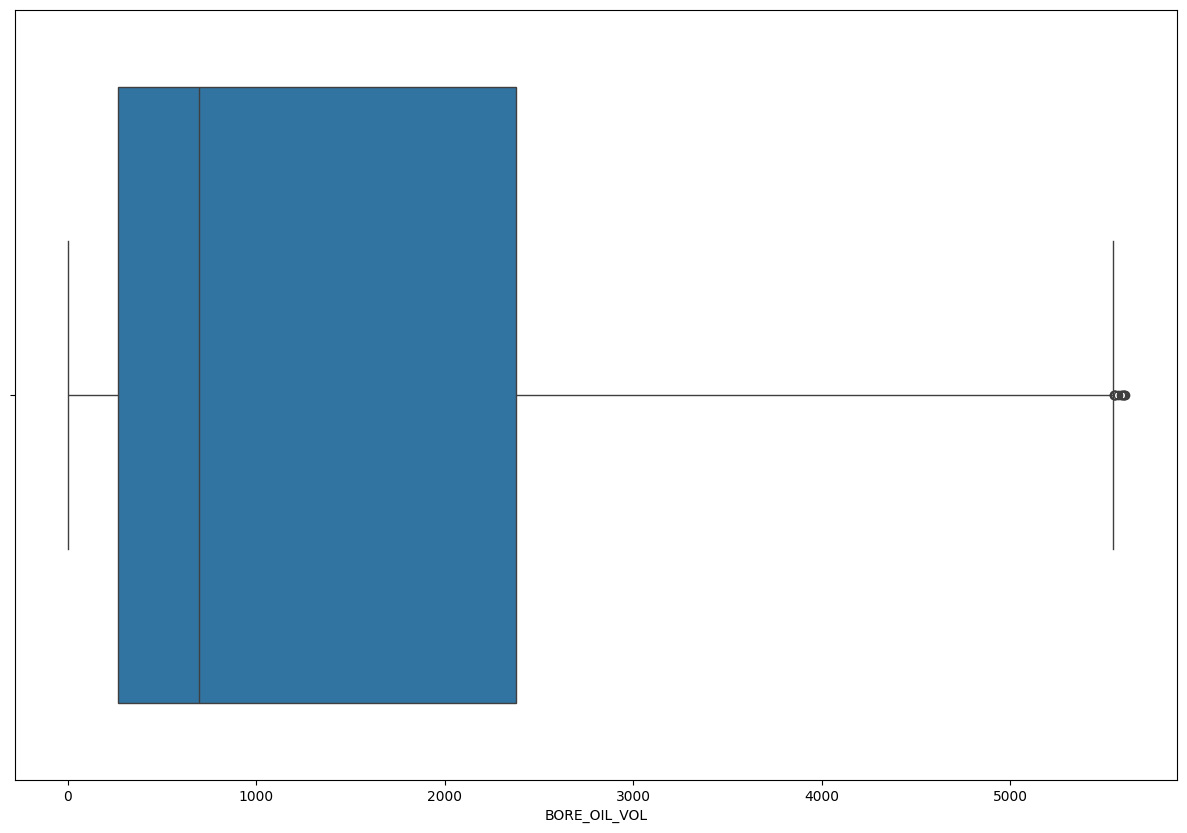

In [35]:
plt.figure(figsize=(15,10))
sns.boxplot(data=Well_3_filtered,x=Well_3_filtered['BORE_OIL_VOL'])
plt.show()

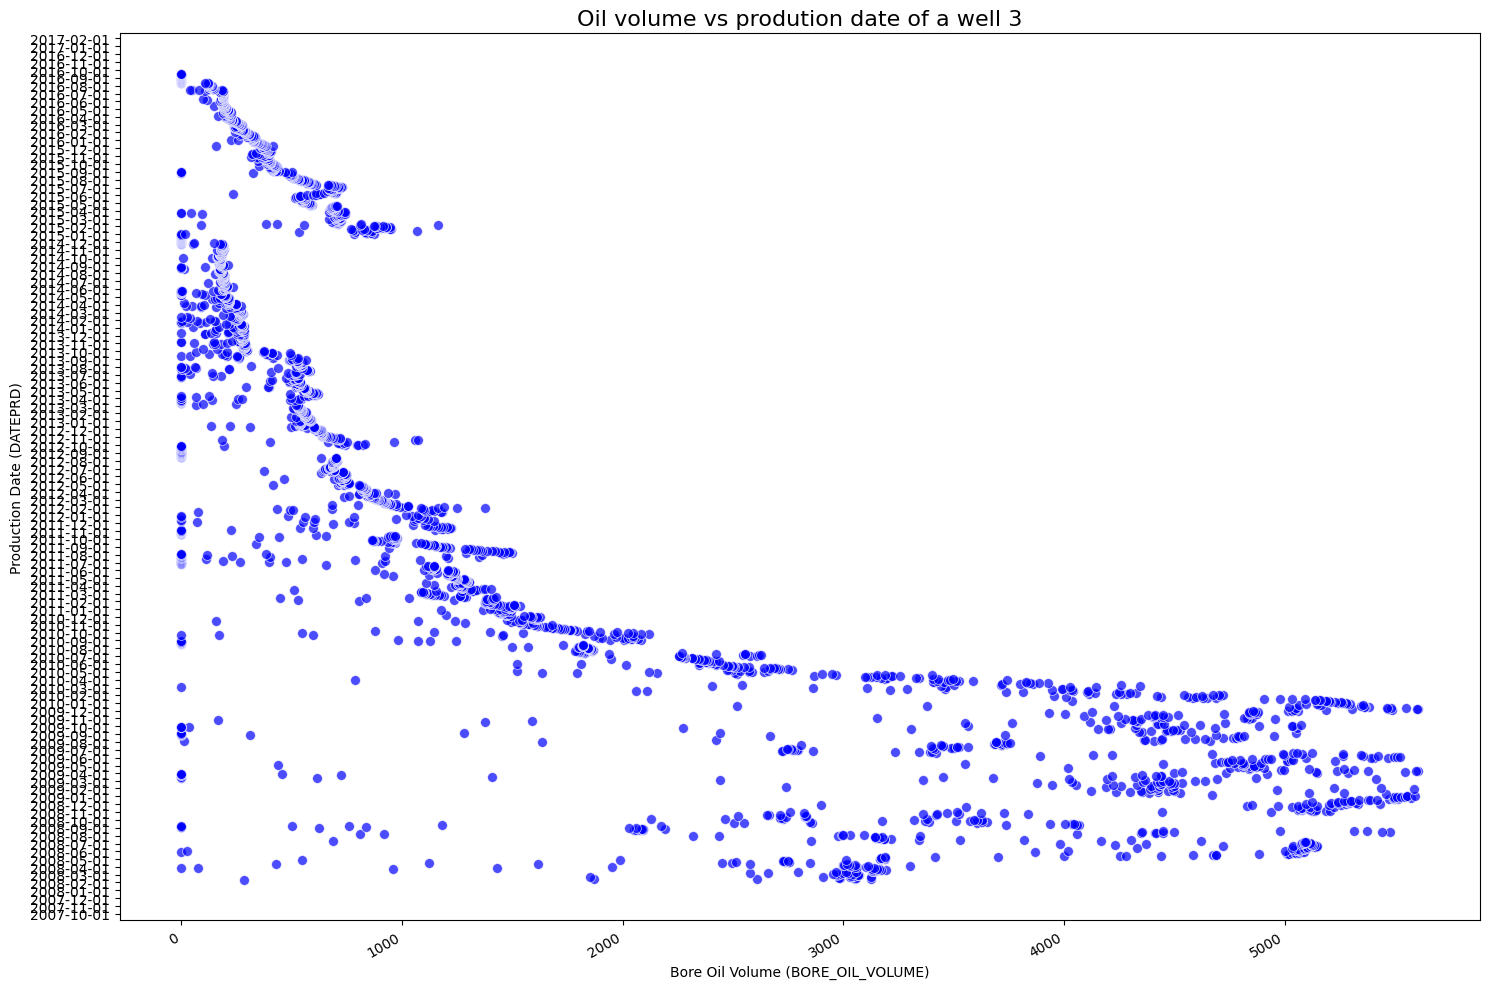

In [36]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=Well_3_filtered,x=Well_3_filtered['BORE_OIL_VOL'],y=Well_3_filtered['DATEPRD'],
                color='blue',
                s=50,
                markers='o',
                alpha=0.7)
## Set axis label and plot title
plt.title('Oil volume vs prodution date of a well 3',fontsize=16)
plt.xlabel('Bore Oil Volume (BORE_OIL_VOLUME)')
plt.ylabel('Production Date (DATEPRD)')

## Rotate date label on y_axis
plt.gca().yaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Format y-axis as dates
plt.gca().yaxis.set_major_locator(mdates.MonthLocator())  # Show major ticks for months
plt.gcf().autofmt_xdate()  # Automatically format date labels

# Show the improved plot
plt.tight_layout()
plt.show()


## Well 4

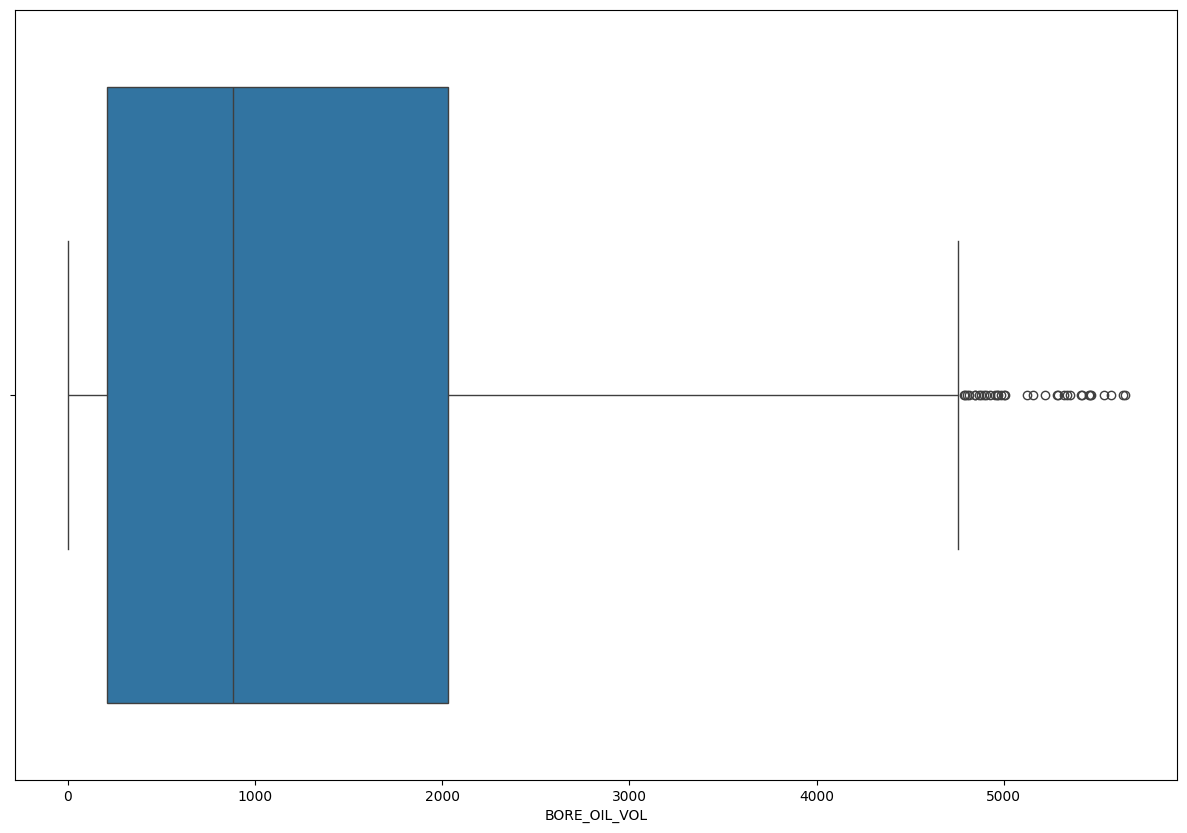

In [37]:
plt.figure(figsize=(15,10))
sns.boxplot(data=Well_4,x=Well_4['BORE_OIL_VOL'])
plt.show()

## Remove Outliers

In [38]:
## Calculate Q1 (25%) and Q3 (75%)
Q1= Well_4['BORE_OIL_VOL'].quantile(0.25)
Q3=Well_4['BORE_OIL_VOL'].quantile(0.75)

## Compute IQR
IQR=Q3-Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

Well_4_filtered=Well_4[(Well_4['BORE_OIL_VOL']>=lower_bound) & (Well_4['BORE_OIL_VOL']<=upper_bound)]
print(f"Outliers removed: {len(Well_4) - len(Well_4_filtered)} rows")


Outliers removed: 34 rows


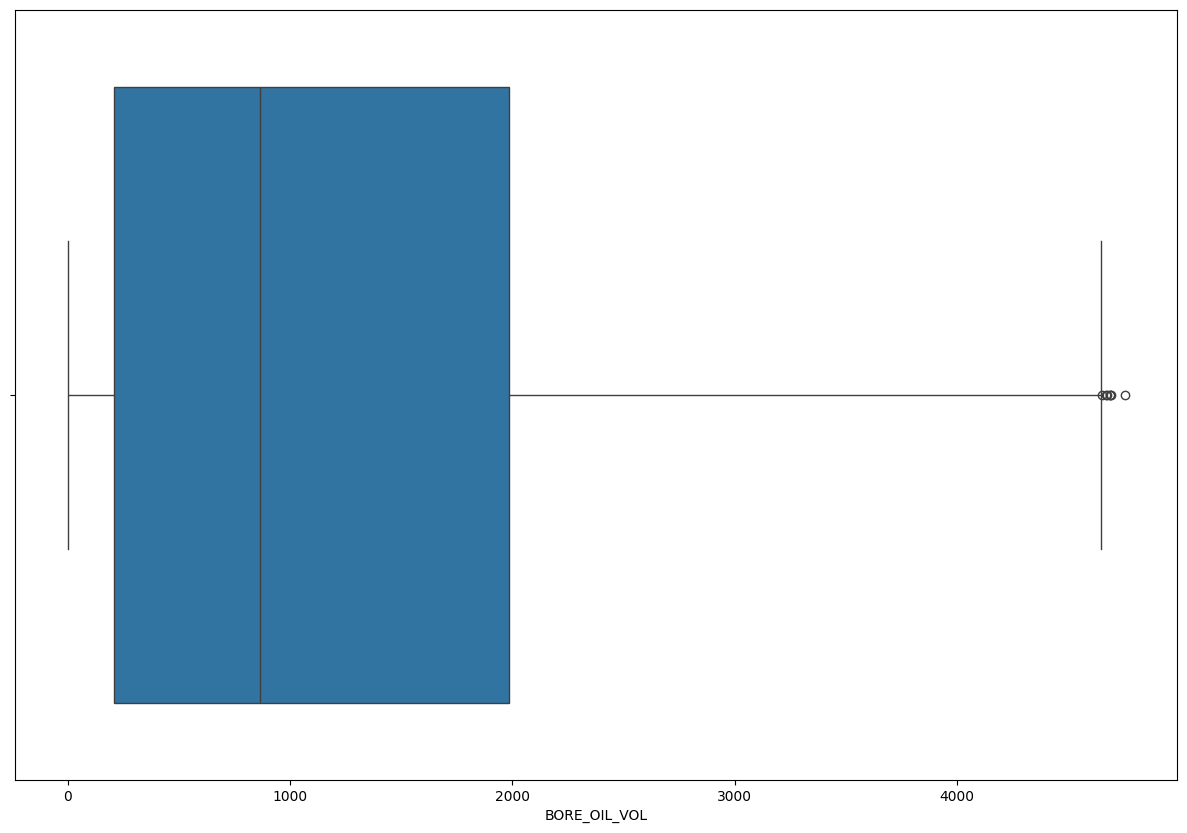

In [39]:
plt.figure(figsize=(15,10))
sns.boxplot(data=Well_4_filtered,x=Well_4_filtered['BORE_OIL_VOL'])
plt.show()

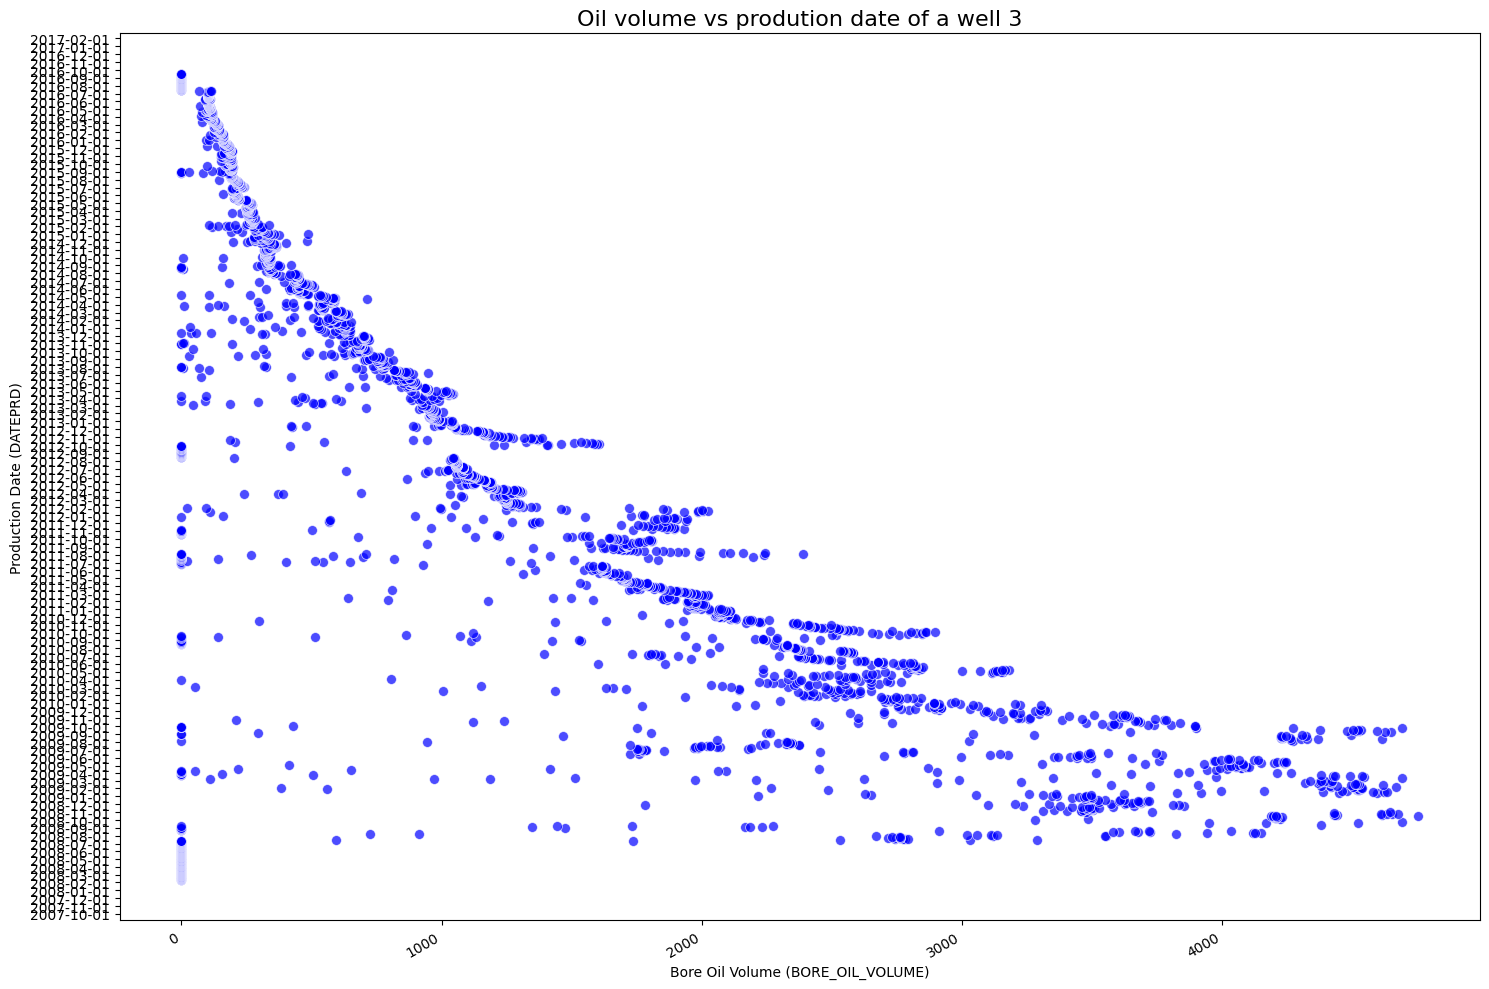

In [40]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=Well_4_filtered,x=Well_4_filtered['BORE_OIL_VOL'],y=Well_4_filtered['DATEPRD'],
                color='blue',
                s=50,
                markers='o',
                alpha=0.7)
## Set axis label and plot title
plt.title('Oil volume vs prodution date of a well 3',fontsize=16)
plt.xlabel('Bore Oil Volume (BORE_OIL_VOLUME)')
plt.ylabel('Production Date (DATEPRD)')

## Rotate date label on y_axis
plt.gca().yaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Format y-axis as dates
plt.gca().yaxis.set_major_locator(mdates.MonthLocator())  # Show major ticks for months
plt.gcf().autofmt_xdate()  # Automatically format date labels

# Show the improved plot
plt.tight_layout()
plt.show()


## Well 5

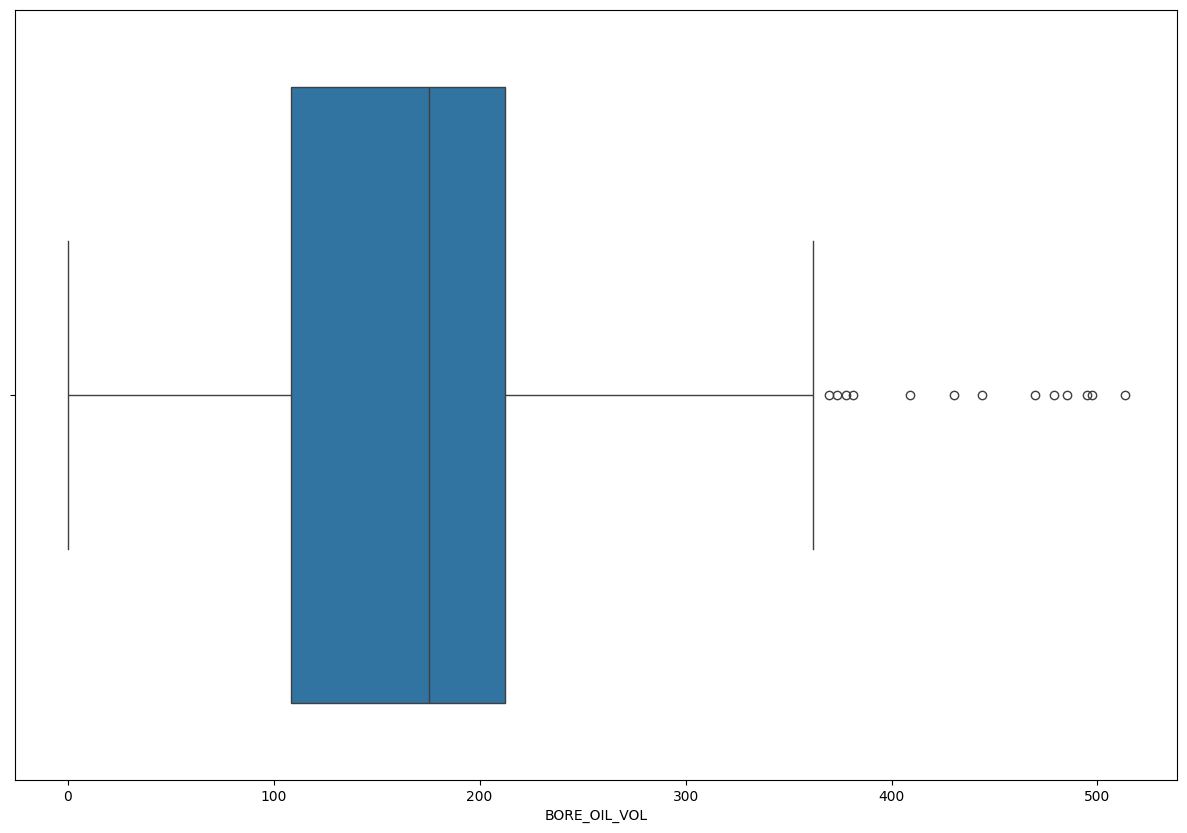

In [41]:
plt.figure(figsize=(15,10))
sns.boxplot(data=Well_5,x=Well_5['BORE_OIL_VOL'])
plt.show()

In [42]:
## Calculate Q1 (25%) and Q3 (75%)
Q1= Well_5['BORE_OIL_VOL'].quantile(0.25)
Q3=Well_5['BORE_OIL_VOL'].quantile(0.75)

## Compute IQR
IQR=Q3-Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

Well_5_filtered=Well_5[(Well_5['BORE_OIL_VOL']>=lower_bound) & (Well_5['BORE_OIL_VOL']<=upper_bound)]
print(f"Outliers removed: {len(Well_5) - len(Well_5_filtered)} rows")


Outliers removed: 13 rows


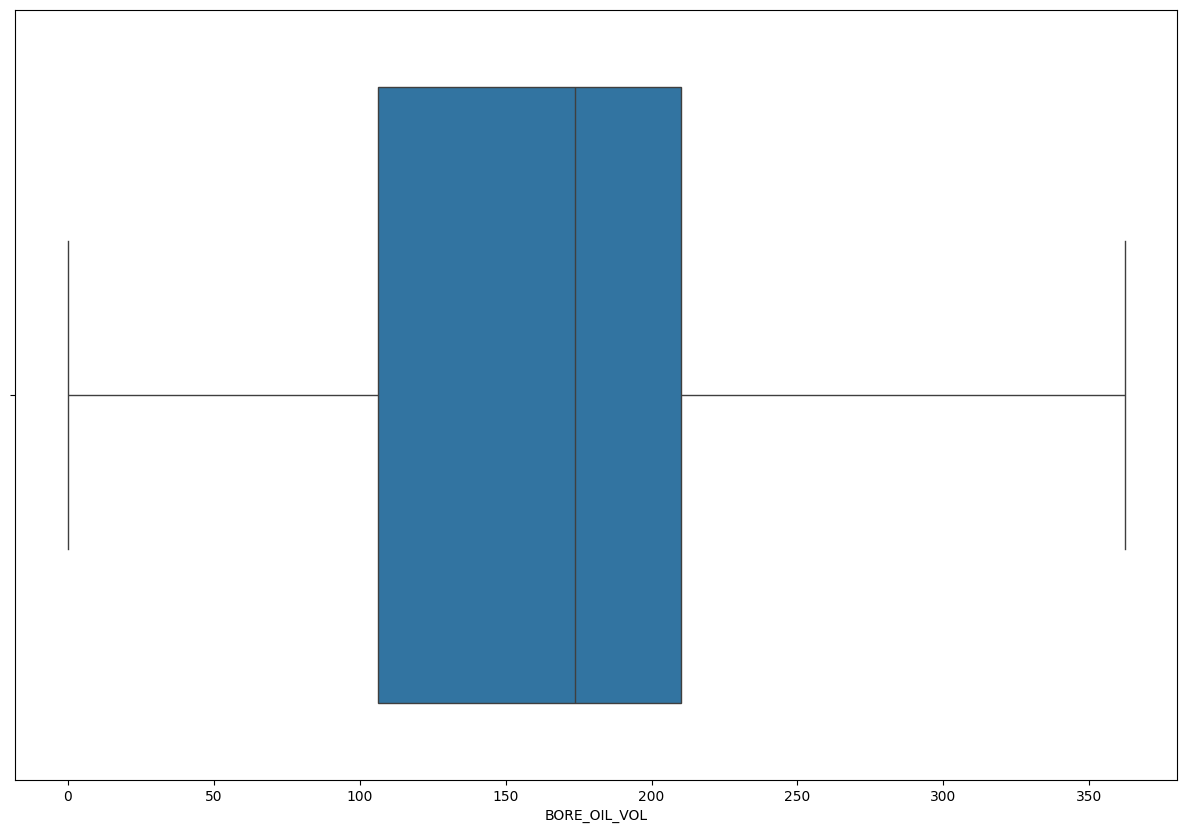

In [43]:
plt.figure(figsize=(15,10))
sns.boxplot(data=Well_5_filtered,x=Well_5_filtered['BORE_OIL_VOL'])
plt.show()

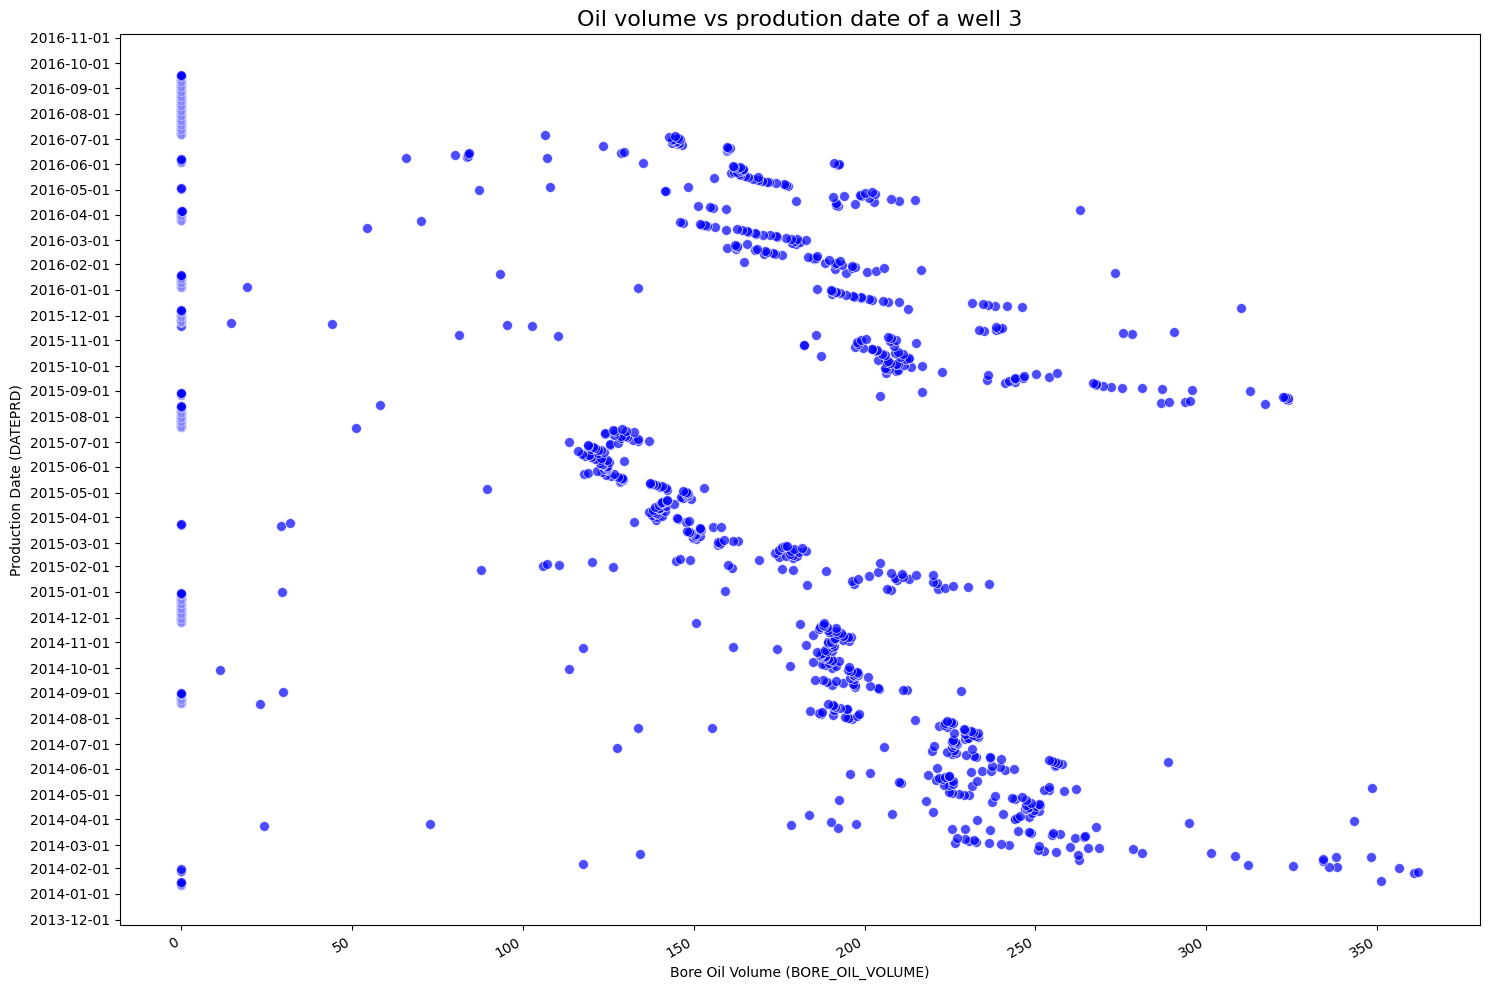

In [44]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=Well_5_filtered,x=Well_5_filtered['BORE_OIL_VOL'],y=Well_5_filtered['DATEPRD'],
                color='blue',
                s=50,
                markers='o',
                alpha=0.7)
## Set axis label and plot title
plt.title('Oil volume vs prodution date of a well 3',fontsize=16)
plt.xlabel('Bore Oil Volume (BORE_OIL_VOLUME)')
plt.ylabel('Production Date (DATEPRD)')

## Rotate date label on y_axis
plt.gca().yaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Format y-axis as dates
plt.gca().yaxis.set_major_locator(mdates.MonthLocator())  # Show major ticks for months
plt.gcf().autofmt_xdate()  # Automatically format date labels

# Show the improved plot
plt.tight_layout()
plt.show()


## Well 6

In [45]:
Well_6.shape

(3327, 24)

In [46]:
Well_6.isnull().sum()

DATEPRD                        0
WELL_BORE_CODE                 0
NPD_WELL_BORE_CODE             0
NPD_WELL_BORE_NAME             0
NPD_FIELD_CODE                 0
NPD_FIELD_NAME                 0
NPD_FACILITY_CODE              0
NPD_FACILITY_NAME              0
ON_STREAM_HRS                152
AVG_DOWNHOLE_PRESSURE       3327
AVG_DOWNHOLE_TEMPERATURE    3327
AVG_DP_TUBING               3327
AVG_ANNULUS_PRESS           3327
AVG_CHOKE_SIZE_P            3327
AVG_CHOKE_UOM               3327
AVG_WHP_P                   3327
AVG_WHT_P                   3327
DP_CHOKE_SIZE                154
BORE_OIL_VOL                3327
BORE_GAS_VOL                3327
BORE_WAT_VOL                3327
BORE_WI_VOL                  337
FLOW_KIND                      0
WELL_TYPE                      0
dtype: int64

## Well 7

In [47]:
Well_7.shape

(3306, 24)

In [48]:
Well_7.isnull().sum()

DATEPRD                        0
WELL_BORE_CODE                 0
NPD_WELL_BORE_CODE             0
NPD_WELL_BORE_NAME             0
NPD_FIELD_CODE                 0
NPD_FIELD_NAME                 0
NPD_FACILITY_CODE              0
NPD_FACILITY_NAME              0
ON_STREAM_HRS                133
AVG_DOWNHOLE_PRESSURE       3306
AVG_DOWNHOLE_TEMPERATURE    3306
AVG_DP_TUBING               3306
AVG_ANNULUS_PRESS           3146
AVG_CHOKE_SIZE_P            3146
AVG_CHOKE_UOM               3146
AVG_WHP_P                   3146
AVG_WHT_P                   3155
DP_CHOKE_SIZE                134
BORE_OIL_VOL                3146
BORE_GAS_VOL                3146
BORE_WAT_VOL                3146
BORE_WI_VOL                  590
FLOW_KIND                      0
WELL_TYPE                      0
dtype: int64

## Well 6 and Well 7 has zero oil production data , which means it can be injection well

## Creating New DataFrame

In [49]:
new_df=pd.concat([Well_1_filtered,Well_2,Well_3_filtered,Well_4_filtered,Well_5_filtered,Well_6,Well_7],axis=0,ignore_index=True)

In [50]:
new_df.isnull().sum()

DATEPRD                        0
WELL_BORE_CODE                 0
NPD_WELL_BORE_CODE             0
NPD_WELL_BORE_NAME             0
NPD_FIELD_CODE                 0
NPD_FIELD_NAME                 0
NPD_FACILITY_CODE              0
NPD_FACILITY_NAME              0
ON_STREAM_HRS                285
AVG_DOWNHOLE_PRESSURE       6649
AVG_DOWNHOLE_TEMPERATURE    6649
AVG_DP_TUBING               6649
AVG_ANNULUS_PRESS           7704
AVG_CHOKE_SIZE_P            6715
AVG_CHOKE_UOM               6473
AVG_WHP_P                   6479
AVG_WHT_P                   6488
DP_CHOKE_SIZE                294
BORE_OIL_VOL                6473
BORE_GAS_VOL                6473
BORE_WAT_VOL                6473
BORE_WI_VOL                 9858
FLOW_KIND                      0
WELL_TYPE                      0
dtype: int64

In [51]:
# Save as Excel
new_df.to_excel('Volve_dataframe.xlsx', index=False)



## Saved the data set 

## Data Vizualization On New Data

# <p style="padding:10px;background-color:#87CEEB ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Empirical Cumulative Distribution Function</p>

### The Empirical Cumulative Distribution Function (ECDF) is a statistical tool used in various industries, including the oil and gas industry, to analyze and visualize the distribution of data. In the context of the oil and gas industry, ECDF can be particularly useful for understanding and analyzing various aspects of exploration, production, and reservoir management.

In [52]:
well6 = new_df['NPD_WELL_BORE_CODE'] == 5693

df_well6 = new_df[well6]
print(df_well6.info())

<class 'pandas.core.frame.DataFrame'>
Index: 3327 entries, 8931 to 12257
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   DATEPRD                   3327 non-null   datetime64[ns]
 1   WELL_BORE_CODE            3327 non-null   object        
 2   NPD_WELL_BORE_CODE        3327 non-null   int64         
 3   NPD_WELL_BORE_NAME        3327 non-null   object        
 4   NPD_FIELD_CODE            3327 non-null   int64         
 5   NPD_FIELD_NAME            3327 non-null   object        
 6   NPD_FACILITY_CODE         3327 non-null   int64         
 7   NPD_FACILITY_NAME         3327 non-null   object        
 8   ON_STREAM_HRS             3175 non-null   float64       
 9   AVG_DOWNHOLE_PRESSURE     0 non-null      float64       
 10  AVG_DOWNHOLE_TEMPERATURE  0 non-null      float64       
 11  AVG_DP_TUBING             0 non-null      float64       
 12  AVG_ANNULUS_PRESS    

In [53]:
well7 = new_df['NPD_WELL_BORE_CODE'] == 5769

df_well7 = new_df[well7]
print(df_well7.info())

<class 'pandas.core.frame.DataFrame'>
Index: 3306 entries, 12258 to 15563
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   DATEPRD                   3306 non-null   datetime64[ns]
 1   WELL_BORE_CODE            3306 non-null   object        
 2   NPD_WELL_BORE_CODE        3306 non-null   int64         
 3   NPD_WELL_BORE_NAME        3306 non-null   object        
 4   NPD_FIELD_CODE            3306 non-null   int64         
 5   NPD_FIELD_NAME            3306 non-null   object        
 6   NPD_FACILITY_CODE         3306 non-null   int64         
 7   NPD_FACILITY_NAME         3306 non-null   object        
 8   ON_STREAM_HRS             3173 non-null   float64       
 9   AVG_DOWNHOLE_PRESSURE     0 non-null      float64       
 10  AVG_DOWNHOLE_TEMPERATURE  0 non-null      float64       
 11  AVG_DP_TUBING             0 non-null      float64       
 12  AVG_ANNULUS_PRESS   

In [54]:
well3 = new_df['NPD_WELL_BORE_CODE'] == 5599
df_well3 = new_df[well3]
print(df_well3.info())

<class 'pandas.core.frame.DataFrame'>
Index: 3046 entries, 1898 to 4943
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   DATEPRD                   3046 non-null   datetime64[ns]
 1   WELL_BORE_CODE            3046 non-null   object        
 2   NPD_WELL_BORE_CODE        3046 non-null   int64         
 3   NPD_WELL_BORE_NAME        3046 non-null   object        
 4   NPD_FIELD_CODE            3046 non-null   int64         
 5   NPD_FIELD_NAME            3046 non-null   object        
 6   NPD_FACILITY_CODE         3046 non-null   int64         
 7   NPD_FACILITY_NAME         3046 non-null   object        
 8   ON_STREAM_HRS             3046 non-null   float64       
 9   AVG_DOWNHOLE_PRESSURE     3045 non-null   float64       
 10  AVG_DOWNHOLE_TEMPERATURE  3045 non-null   float64       
 11  AVG_DP_TUBING             3045 non-null   float64       
 12  AVG_ANNULUS_PRESS     

In [55]:
well4 = new_df['NPD_WELL_BORE_CODE'] == 5351

df_well4 = new_df[well4]
print(df_well4.info())

<class 'pandas.core.frame.DataFrame'>
Index: 3022 entries, 4944 to 7965
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   DATEPRD                   3022 non-null   datetime64[ns]
 1   WELL_BORE_CODE            3022 non-null   object        
 2   NPD_WELL_BORE_CODE        3022 non-null   int64         
 3   NPD_WELL_BORE_NAME        3022 non-null   object        
 4   NPD_FIELD_CODE            3022 non-null   int64         
 5   NPD_FIELD_NAME            3022 non-null   object        
 6   NPD_FACILITY_CODE         3022 non-null   int64         
 7   NPD_FACILITY_NAME         3022 non-null   object        
 8   ON_STREAM_HRS             3022 non-null   float64       
 9   AVG_DOWNHOLE_PRESSURE     3016 non-null   float64       
 10  AVG_DOWNHOLE_TEMPERATURE  3016 non-null   float64       
 11  AVG_DP_TUBING             3016 non-null   float64       
 12  AVG_ANNULUS_PRESS     

In [56]:
well2 = new_df['NPD_WELL_BORE_CODE'] == 7078

df_well2 = new_df[well2]
print(df_well2.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1165 entries, 733 to 1897
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   DATEPRD                   1165 non-null   datetime64[ns]
 1   WELL_BORE_CODE            1165 non-null   object        
 2   NPD_WELL_BORE_CODE        1165 non-null   int64         
 3   NPD_WELL_BORE_NAME        1165 non-null   object        
 4   NPD_FIELD_CODE            1165 non-null   int64         
 5   NPD_FIELD_NAME            1165 non-null   object        
 6   NPD_FACILITY_CODE         1165 non-null   int64         
 7   NPD_FACILITY_NAME         1165 non-null   object        
 8   ON_STREAM_HRS             1165 non-null   float64       
 9   AVG_DOWNHOLE_PRESSURE     1159 non-null   float64       
 10  AVG_DOWNHOLE_TEMPERATURE  1159 non-null   float64       
 11  AVG_DP_TUBING             1159 non-null   float64       
 12  AVG_ANNULUS_PRESS      

In [57]:
well5 = new_df['NPD_WELL_BORE_CODE'] == 7289

df_well5 = new_df[well5]
print(df_well5.info())

<class 'pandas.core.frame.DataFrame'>
Index: 965 entries, 7966 to 8930
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   DATEPRD                   965 non-null    datetime64[ns]
 1   WELL_BORE_CODE            965 non-null    object        
 2   NPD_WELL_BORE_CODE        965 non-null    int64         
 3   NPD_WELL_BORE_NAME        965 non-null    object        
 4   NPD_FIELD_CODE            965 non-null    int64         
 5   NPD_FIELD_NAME            965 non-null    object        
 6   NPD_FACILITY_CODE         965 non-null    int64         
 7   NPD_FACILITY_NAME         965 non-null    object        
 8   ON_STREAM_HRS             965 non-null    float64       
 9   AVG_DOWNHOLE_PRESSURE     965 non-null    float64       
 10  AVG_DOWNHOLE_TEMPERATURE  965 non-null    float64       
 11  AVG_DP_TUBING             965 non-null    float64       
 12  AVG_ANNULUS_PRESS      

In [58]:
well1 = new_df['NPD_WELL_BORE_CODE'] == 7405

df_well1 = new_df[well1]
print(df_well1.info())

<class 'pandas.core.frame.DataFrame'>
Index: 733 entries, 0 to 732
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   DATEPRD                   733 non-null    datetime64[ns]
 1   WELL_BORE_CODE            733 non-null    object        
 2   NPD_WELL_BORE_CODE        733 non-null    int64         
 3   NPD_WELL_BORE_NAME        733 non-null    object        
 4   NPD_FIELD_CODE            733 non-null    int64         
 5   NPD_FIELD_NAME            733 non-null    object        
 6   NPD_FACILITY_CODE         733 non-null    int64         
 7   NPD_FACILITY_NAME         733 non-null    object        
 8   ON_STREAM_HRS             733 non-null    float64       
 9   AVG_DOWNHOLE_PRESSURE     730 non-null    float64       
 10  AVG_DOWNHOLE_TEMPERATURE  730 non-null    float64       
 11  AVG_DP_TUBING             730 non-null    float64       
 12  AVG_ANNULUS_PRESS         1

Text(0.5, 1.0, 'Bore Code = 7405(Well 1)')

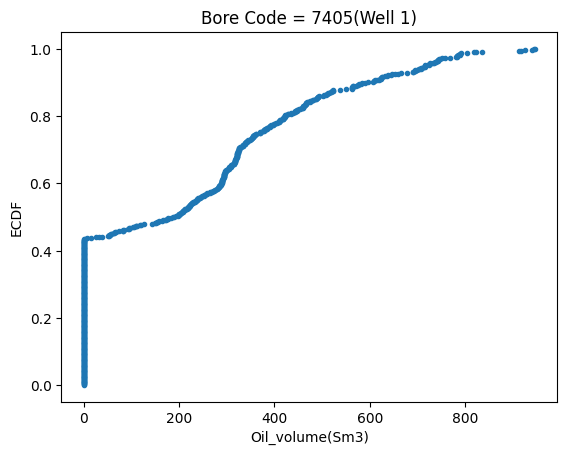

In [59]:
def ecdf(data):
    n=len(data)
    x=np.sort(data)
    y=np.arange(1,n+1)/n
    return x,y
x_axis,y_axis=ecdf(df_well1['BORE_OIL_VOL'])
plt.plot(x_axis,y_axis,marker=".",linestyle='none')

## Labels
plt.xlabel('Oil_volume(Sm3)')
plt.ylabel('ECDF')
plt.title('Bore Code = 7405(Well 1)')



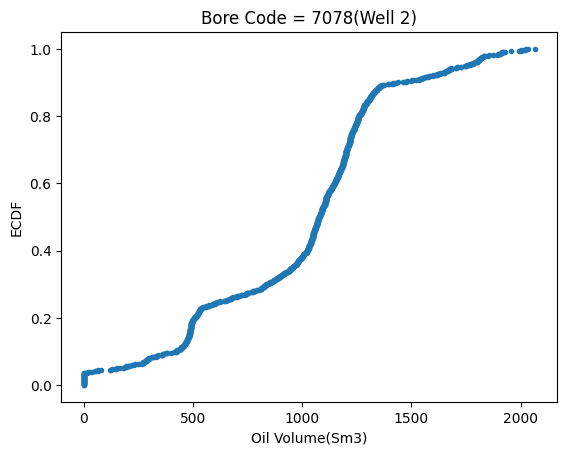

In [60]:
x_axis, y_axis = ecdf(df_well2['BORE_OIL_VOL'])
plt.plot(x_axis, y_axis, marker=".", linestyle="none")

#Labeling
plt.xlabel('Oil Volume(Sm3)')
plt.ylabel('ECDF')
plt.title('Bore Code = 7078(Well 2)')

plt.show()

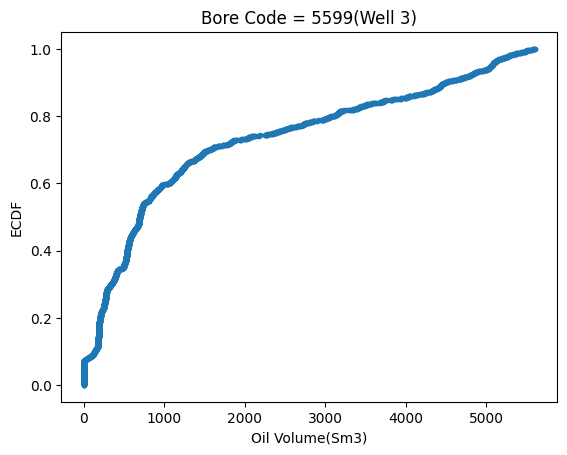

In [61]:
x_axis, y_axis = ecdf(df_well3['BORE_OIL_VOL'])
plt.plot(x_axis, y_axis, marker=".", linestyle="none")

#Labeling
plt.xlabel('Oil Volume(Sm3)')
plt.ylabel('ECDF')
plt.title('Bore Code = 5599(Well 3)')

plt.show()

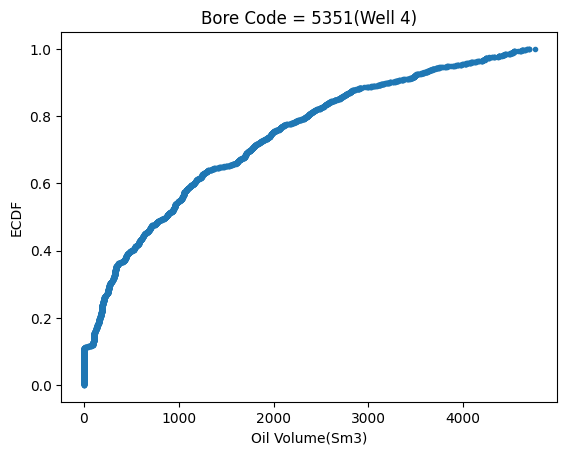

In [62]:
x_axis, y_axis = ecdf(df_well4['BORE_OIL_VOL'])
plt.plot(x_axis, y_axis, marker=".", linestyle="none")

#Labeling
plt.xlabel('Oil Volume(Sm3)')
plt.ylabel('ECDF')
plt.title('Bore Code = 5351(Well 4)')

plt.show()

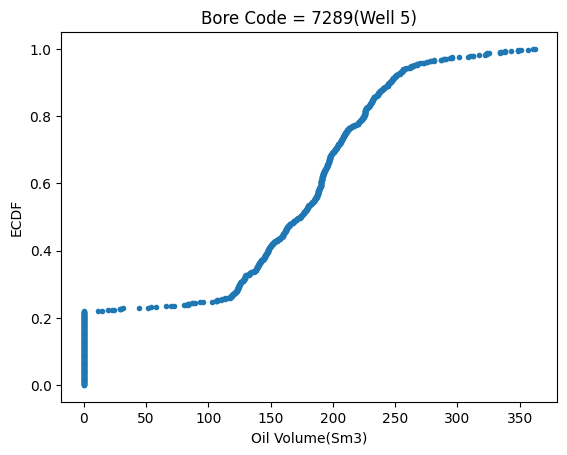

In [63]:
x_axis, y_axis = ecdf(df_well5['BORE_OIL_VOL'])
plt.plot(x_axis, y_axis, marker=".", linestyle="none")

#Labeling
plt.xlabel('Oil Volume(Sm3)')
plt.ylabel('ECDF')
plt.title('Bore Code = 7289(Well 5)')

plt.show()

Text(0.5, 1.0, 'Bore Code = 5693(Well 6)')

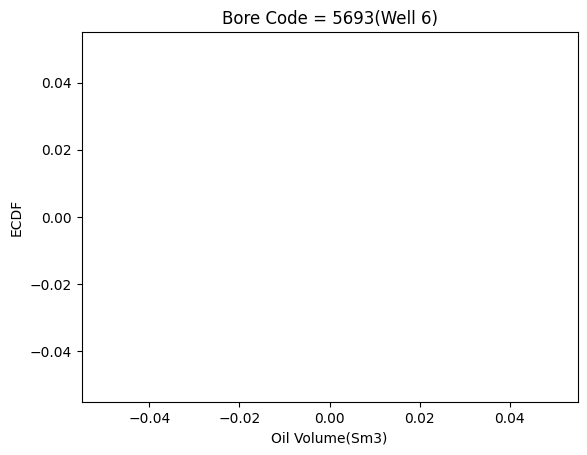

In [64]:
#injector well

x_axis, y_axis = ecdf(df_well6['BORE_OIL_VOL'])
plt.plot(x_axis, y_axis, marker=".", linestyle="none")

#Labeling
plt.xlabel('Oil Volume(Sm3)')
plt.ylabel('ECDF')
plt.title('Bore Code = 5693(Well 6)')

#plt.show()

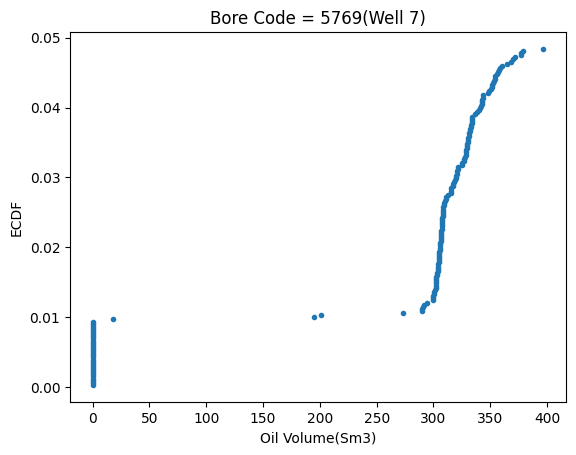

In [65]:
#Injector and producer for some time


x_axis, y_axis = ecdf(df_well7['BORE_OIL_VOL'])
plt.plot(x_axis, y_axis, marker=".", linestyle="none")

#Labeling
plt.xlabel('Oil Volume(Sm3)')
plt.ylabel('ECDF')
plt.title('Bore Code = 5769(Well 7)')

plt.show()

## From the ECDF plots of Oil Production, it can be seen that in Well 1 40% of total data points has 0 Bore Oil Production, and for Well 5 20% of total data points has 0 Bore Oil Production, and these are not NA values these are 0 production points (well is not flowing). So, we will not take these two wells for our model training. Also, it can be seen that ECDF of well 6 is empty, and missing values for Well 7 also, which make the possibility that these wells are injectors. So, we will plot the ECDF of Water Injection volume for these wells.

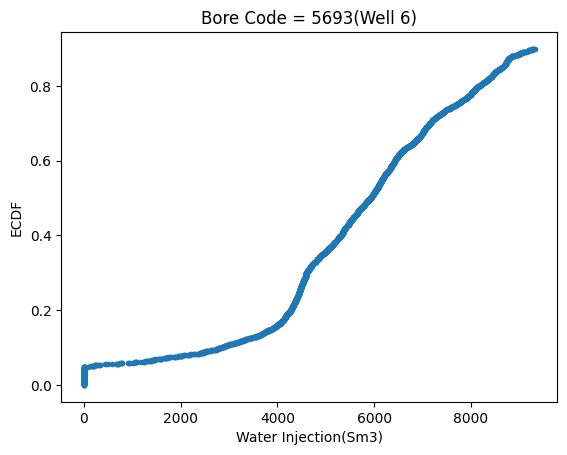

In [66]:
x_axis, y_axis = ecdf(df_well6['BORE_WI_VOL'])
plt.plot(x_axis, y_axis, marker=".", linestyle="none")

#Labeling
plt.xlabel('Water Injection(Sm3)')
plt.ylabel('ECDF')
plt.title('Bore Code = 5693(Well 6)')

plt.show()

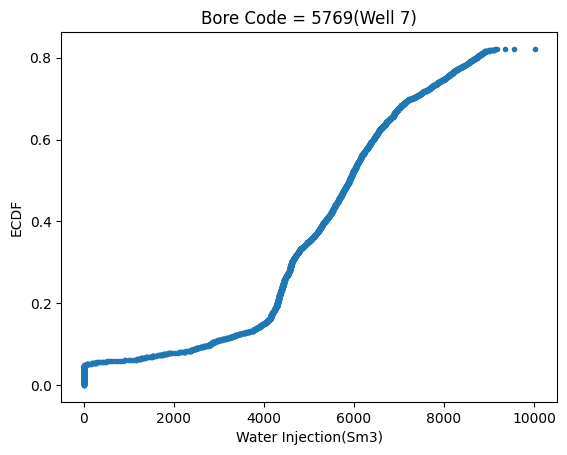

In [67]:
x_axis, y_axis = ecdf(df_well7['BORE_WI_VOL'])
plt.plot(x_axis, y_axis, marker=".", linestyle="none")

#Labeling
plt.xlabel('Water Injection(Sm3)')
plt.ylabel('ECDF')
plt.title('Bore Code = 5769(Well 7)')

plt.show()

# <p style="padding:10px;background-color:#87CEEB ;margin:10;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Box Plot</p>

### Now next step is to get the boxplots of features for each wellbore for properly understanding the statistics of the dataset, knowing the distribution of features.

In [70]:
df1=new_df.select_dtypes(include=float)

In [71]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15564 entries, 0 to 15563
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ON_STREAM_HRS             15279 non-null  float64
 1   AVG_DOWNHOLE_PRESSURE     8915 non-null   float64
 2   AVG_DOWNHOLE_TEMPERATURE  8915 non-null   float64
 3   AVG_DP_TUBING             8915 non-null   float64
 4   AVG_ANNULUS_PRESS         7860 non-null   float64
 5   AVG_CHOKE_SIZE_P          8849 non-null   float64
 6   AVG_WHP_P                 9085 non-null   float64
 7   AVG_WHT_P                 9076 non-null   float64
 8   DP_CHOKE_SIZE             15270 non-null  float64
 9   BORE_OIL_VOL              9091 non-null   float64
 10  BORE_GAS_VOL              9091 non-null   float64
 11  BORE_WAT_VOL              9091 non-null   float64
 12  BORE_WI_VOL               5706 non-null   float64
dtypes: float64(13)
memory usage: 1.5 MB


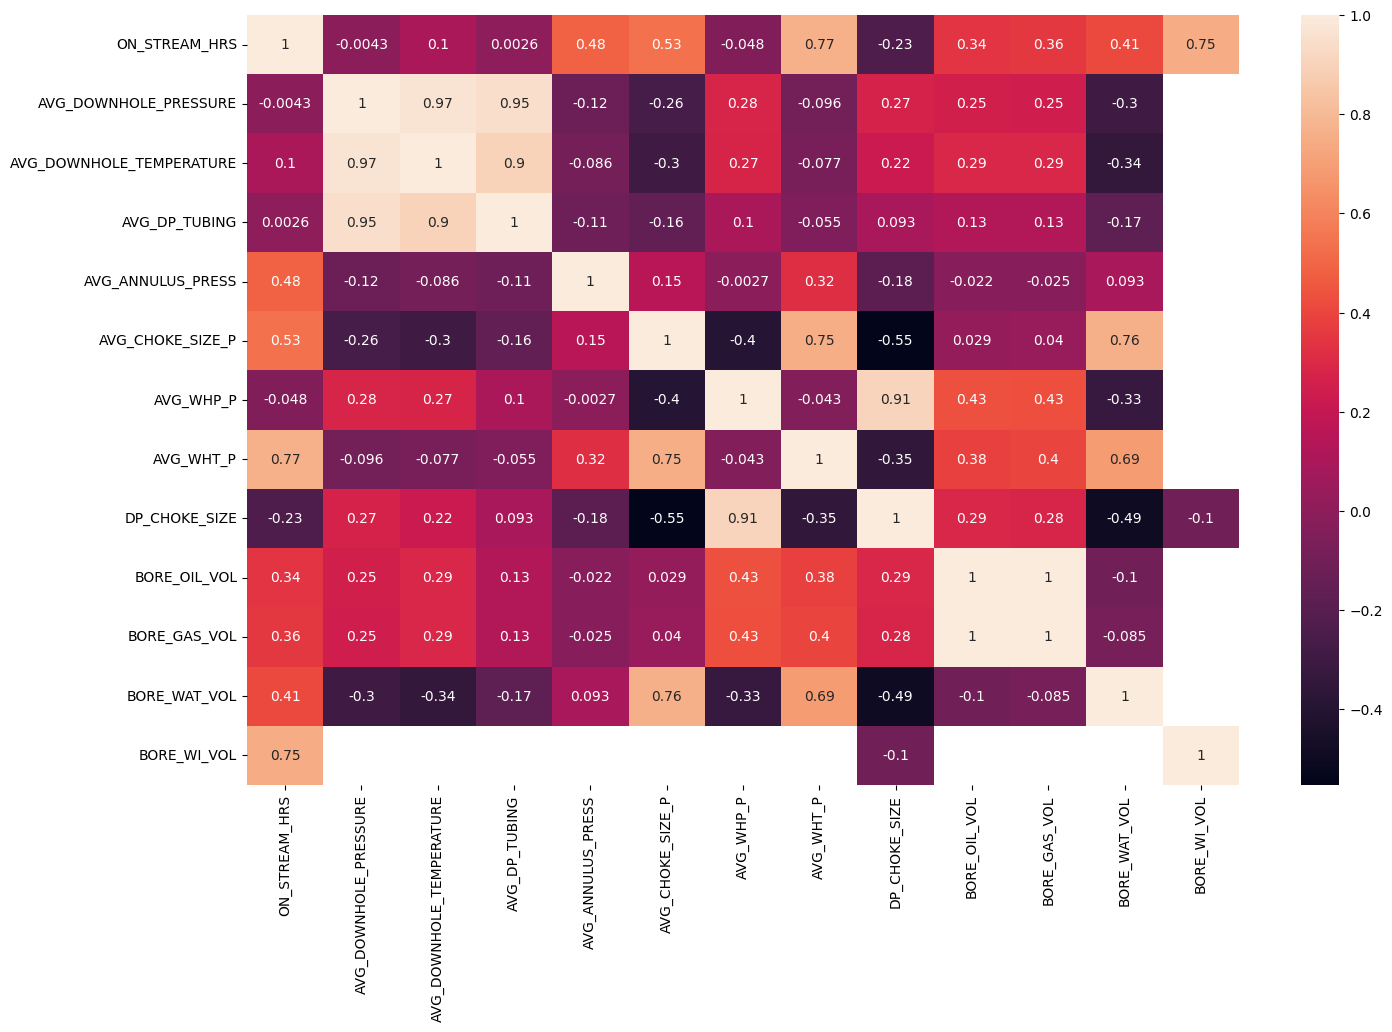

In [72]:
plt.figure(figsize=(16,10))
sns.heatmap(df1.corr(),annot=True)
plt.show()

In [73]:
## Select highly correlated features

In [79]:
def correlation(dataset,threshold):
    col_corr=set()
    col_matrix=dataset.corr()
    for i in range(len(col_matrix.columns)):
        for j in range(i):
            if (col_matrix.iloc[i,j])>threshold:
                col_name=col_matrix.columns[i]
                col_corr.add(col_name)
    return col_corr

In [80]:
corr_features = correlation(df1, 0.99)
len(set(corr_features))

1

In [81]:
list(corr_features)

['BORE_GAS_VOL']

<Axes: xlabel='NPD_WELL_BORE_CODE', ylabel='BORE_WI_VOL'>

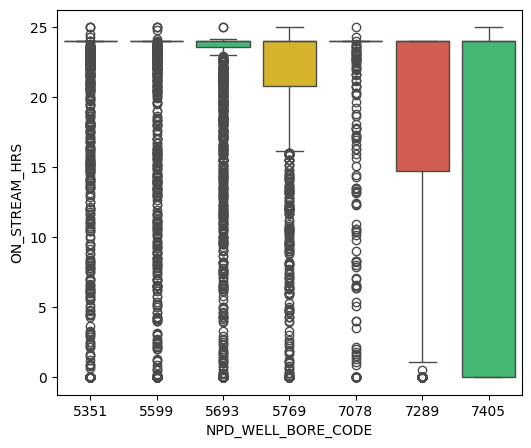

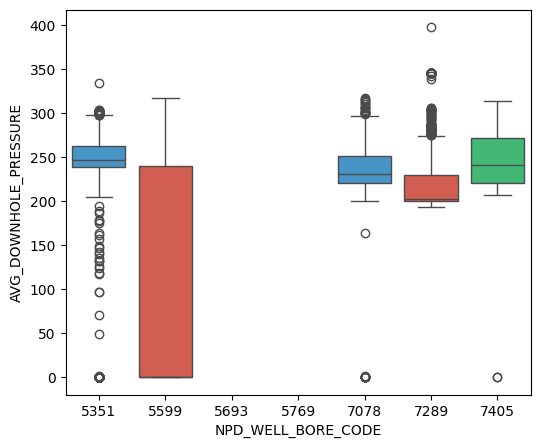

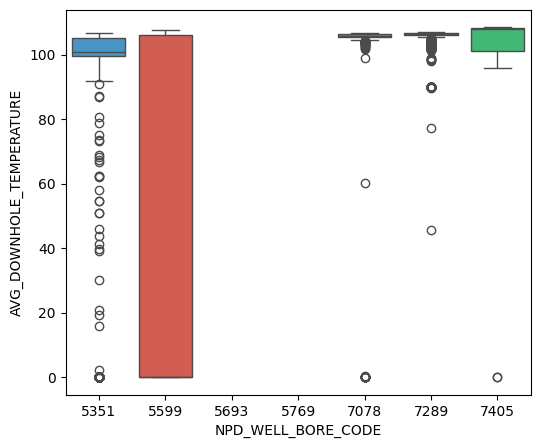

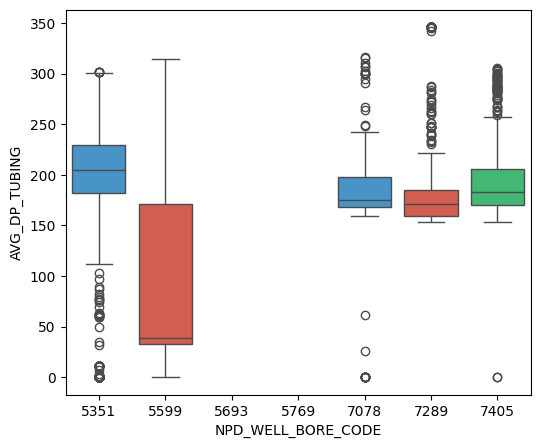

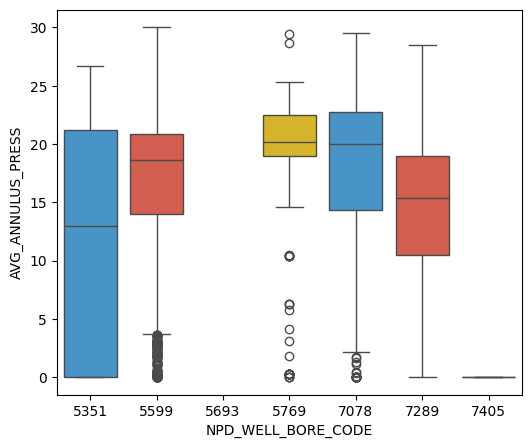

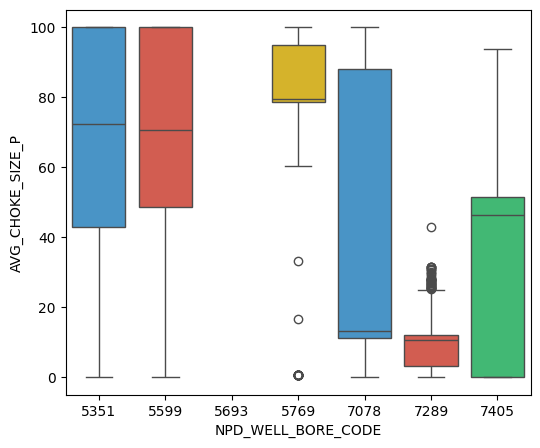

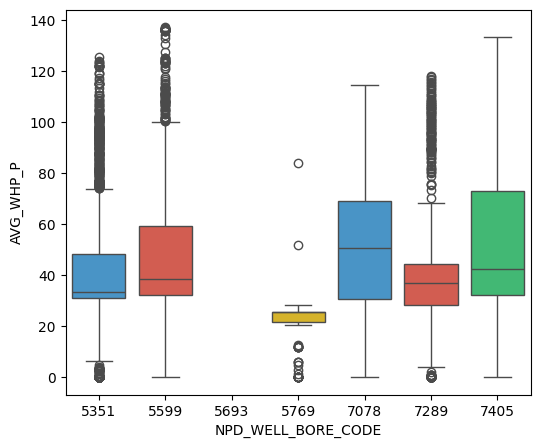

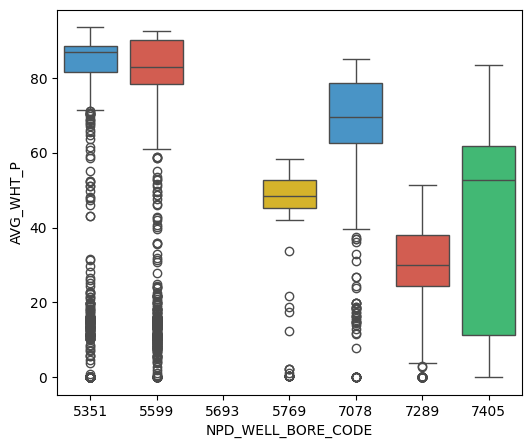

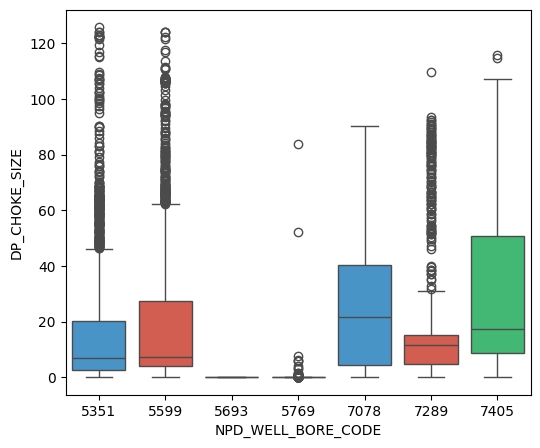

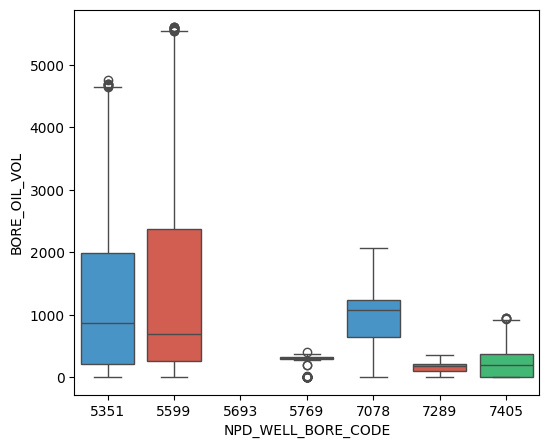

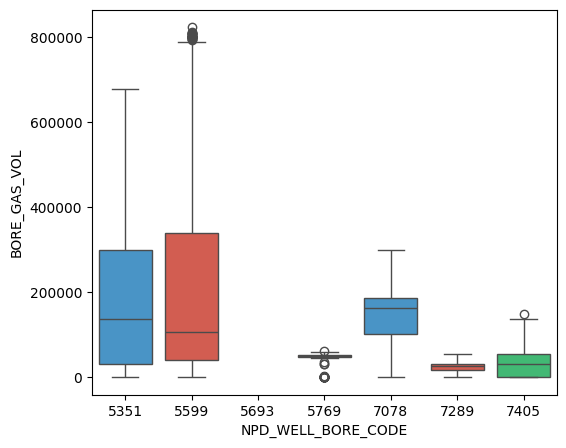

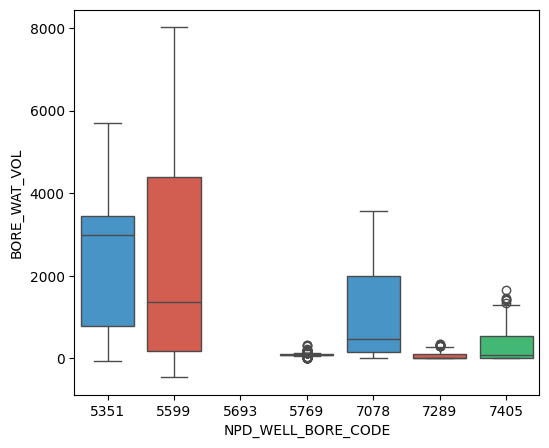

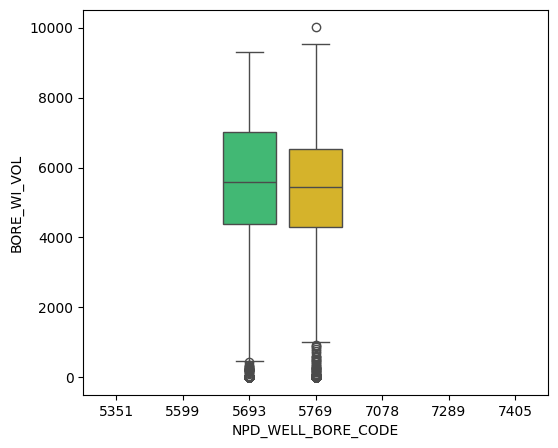

In [86]:
#Plotting boxplots for all the main features to visualize the distribution of data
#%matplotlib notebook
palette = ["#3498db", "#e74c3c", "#2ecc71", "#f1c40f"]  # Different color
figuresizes = (6,5)
plt.figure(figsize=figuresizes)
sns.boxplot(x = 'NPD_WELL_BORE_CODE', y = 'ON_STREAM_HRS', data=new_df,palette=palette)

plt.figure(figsize=figuresizes)
sns.boxplot(x = 'NPD_WELL_BORE_CODE', y = 'AVG_DOWNHOLE_PRESSURE', data=new_df,palette=palette)

plt.figure(figsize=figuresizes)
sns.boxplot(x = 'NPD_WELL_BORE_CODE', y = 'AVG_DOWNHOLE_TEMPERATURE', data=new_df,palette=palette)

plt.figure(figsize=figuresizes)
sns.boxplot(x = 'NPD_WELL_BORE_CODE', y = 'AVG_DP_TUBING', data=new_df,palette=palette)

plt.figure(figsize=figuresizes)
sns.boxplot(x = 'NPD_WELL_BORE_CODE', y = 'AVG_ANNULUS_PRESS', data=new_df,palette=palette)

plt.figure(figsize=figuresizes)
sns.boxplot(x = 'NPD_WELL_BORE_CODE', y = 'AVG_CHOKE_SIZE_P', data=new_df,palette=palette)

plt.figure(figsize=figuresizes)
sns.boxplot(x = 'NPD_WELL_BORE_CODE', y = 'AVG_WHP_P', data=new_df,palette=palette)

plt.figure(figsize=figuresizes)
sns.boxplot(x = 'NPD_WELL_BORE_CODE', y = 'AVG_WHT_P', data=new_df,palette=palette)

plt.figure(figsize=figuresizes)
sns.boxplot(x = 'NPD_WELL_BORE_CODE', y = 'DP_CHOKE_SIZE', data=new_df,palette=palette)

plt.figure(figsize=figuresizes)
sns.boxplot(x = 'NPD_WELL_BORE_CODE', y = 'BORE_OIL_VOL', data=new_df,palette=palette)

plt.figure(figsize=figuresizes)
sns.boxplot(x = 'NPD_WELL_BORE_CODE', y = 'BORE_GAS_VOL', data=new_df,palette=palette)

plt.figure(figsize=figuresizes)
sns.boxplot(x = 'NPD_WELL_BORE_CODE', y = 'BORE_WAT_VOL', data=new_df,palette=palette)

plt.figure(figsize=figuresizes)
sns.boxplot(x = 'NPD_WELL_BORE_CODE', y = 'BORE_WI_VOL', data=new_df,palette=palette)

## From the box plot it is clear that the data is highly skewed and depends on well so while dealing with the null values we cannot use the mean method.

In [87]:
palette = ["#3498db", "#e74c3c", "#2ecc71", "#f1c40f"]  # Different color